# FINAL CLEANED CODE

## MANAGE DEPENDENCIES

In [248]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install sklearn
%pip install scikit-learn
%pip install seaborn
%pip install imblearn
%pip install catboost


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA ON STEAM_1 AND STEAM_2

### EDA STEAM_1

In [250]:
# read converted big
df = pd.read_csv("data/converted_big.csv")
df.head(2)

,app_id,Name,Release date,Required age,Price,DLC count,Detailed description,About the game,Short description,Reviews,...,Positive,Negative,Estimated owners,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Peak CCU,Tags,discount
0,20200,Galactic Bowling,"Oct 21, 2008",0,19.99,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,NaN,...,6,11,0 - 20000,0,0,0,0,0,"Indie,Casual,Sports,Bowling",NaN
1,655370,Train Bandit,"Oct 12, 2017",0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,NaN,...,53,5,0 - 20000,0,0,0,0,0,"Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",NaN


#### BASIC

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   app_id                      111452 non-null  int64  
 1   Name                        111446 non-null  object 
 2   Release date                111452 non-null  object 
 3   Required age                111452 non-null  int64  
 4   Price                       111452 non-null  float64
 5   DLC count                   111452 non-null  int64  
 6   Detailed description        104995 non-null  object 
 7   About the game              104969 non-null  object 
 8   Short description           105076 non-null  object 
 9   Reviews                     10624 non-null   object 
 10  Header image                111452 non-null  object 
 11  Website                     46458 non-null   object 
 12  Support url                 50759 non-null   object 
 13  Support email 

In [252]:
df.columns

Index(['app_id', 'Name', 'Release date', 'Required age', 'Price', 'DLC count',
       'Detailed description', 'About the game', 'Short description',
       'Reviews', 'Header image', 'Website', 'Support url', 'Support email',
       'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url',
       'Achievements', 'Recommendations', 'Notes', 'Supported languages',
       'Full audio languages', 'Packages', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Screenshots', 'Movies', 'User score',
       'Score rank', 'Positive', 'Negative', 'Estimated owners',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Peak CCU',
       'Tags', 'discount'],
      dtype='object')

In [253]:
df.shape

(111452, 43)

#### MISSING VALUE IDENTIFICATION

In [254]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / df.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

,Missing Values,Percentage
Score rank,111408,99.960521
Metacritic url,107447,96.406525
Reviews,100828,90.467645
discount,97410,87.400854
Notes,93003,83.446686
Full audio languages,65823,59.059505
Website,64994,58.315687
Support url,60693,54.456627
Tags,37423,33.577684
Support email,19025,17.070129


In [255]:
df['Website']

0              http://www.galacticbowling.net
1                      http://trainbandit.com
2                                         NaN
3                    https://henosisgame.com/
4         https://www.unusual-games.com/home/
                         ...                 
111447                                    NaN
111448         https://www.hentaipanda.games/
111449                                    NaN
111450                   https://accubow.com/
111451               https://www.ledxfun.com/
Name: Website, Length: 111452, dtype: object

In [256]:
df['Header image']

0         https://cdn.akamai.steamstatic.com/steam/apps/...
1         https://cdn.akamai.steamstatic.com/steam/apps/...
2         https://cdn.akamai.steamstatic.com/steam/apps/...
3         https://cdn.akamai.steamstatic.com/steam/apps/...
4         https://cdn.akamai.steamstatic.com/steam/apps/...
                                ...                        
111447    https://shared.akamai.steamstatic.com/store_it...
111448    https://shared.akamai.steamstatic.com/store_it...
111449    https://shared.akamai.steamstatic.com/store_it...
111450    https://shared.akamai.steamstatic.com/store_it...
111451    https://shared.akamai.steamstatic.com/store_it...
Name: Header image, Length: 111452, dtype: object

In [257]:
df.drop(columns=['Header image', 'Website', 'Support url', 'Support email', 'Metacritic url'], inplace=True)

df.columns

Index(['app_id', 'Name', 'Release date', 'Required age', 'Price', 'DLC count',
       'Detailed description', 'About the game', 'Short description',
       'Reviews', 'Windows', 'Mac', 'Linux', 'Metacritic score',
       'Achievements', 'Recommendations', 'Notes', 'Supported languages',
       'Full audio languages', 'Packages', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Screenshots', 'Movies', 'User score',
       'Score rank', 'Positive', 'Negative', 'Estimated owners',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Peak CCU',
       'Tags', 'discount'],
      dtype='object')

In [258]:
steam1 = df.copy()

### EDA STEAM_2

In [259]:
steam2 = pd.read_csv('data/games_small.csv')
steam2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [260]:
steam2.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [261]:
steam1[steam1['app_id'] == 13500]

,app_id,Name,Release date,Required age,Price,DLC count,Detailed description,About the game,Short description,Reviews,...,Positive,Negative,Estimated owners,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Peak CCU,Tags,discount
31285,13500,Prince of Persia: Warrior Within™,"Nov 21, 2008",17,9.99,0,Enter the dark underworld of Prince of Persia ...,Enter the dark underworld of Prince of Persia ...,Enter the dark underworld of Prince of Persia ...,NaN,...,1807,307,200000 - 500000,61,10,77,10,18,"Action,Adventure,Parkour,Third Person,Great So...",NaN


In [262]:
steam2[steam2['app_id'] == 13500]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True


## MERGE STEAM_1 AND STEAM_2

In [263]:
steam1.drop(columns=['Release date', 'Price', 'discount'], inplace=True)
steam1.columns

Index(['app_id', 'Name', 'Required age', 'DLC count', 'Detailed description',
       'About the game', 'Short description', 'Reviews', 'Windows', 'Mac',
       'Linux', 'Metacritic score', 'Achievements', 'Recommendations', 'Notes',
       'Supported languages', 'Full audio languages', 'Packages', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Screenshots', 'Movies',
       'User score', 'Score rank', 'Positive', 'Negative', 'Estimated owners',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Peak CCU',
       'Tags'],
      dtype='object')

In [264]:
steam2.drop(columns=['title', 'win', 'mac', 'linux'], inplace=True)
steam2.columns

Index(['app_id', 'date_release', 'rating', 'positive_ratio', 'user_reviews',
       'price_final', 'price_original', 'discount', 'steam_deck'],
      dtype='object')

In [265]:
merged_df = pd.merge(steam1, steam2, on='app_id', how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   app_id                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [266]:
# Rename columns so it in same name format
merged_df.rename(columns={
    'app_id': 'App ID',
    'date_release': 'Release date',
    'positive_ratio': 'Positive ratio',
    'price_final': 'Price final',
    'price_original': 'Price original',
    'discount': 'Discount',
    'steam_deck': 'Steam Deck',
}, inplace=True)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [267]:
merged_df.to_csv("data/merged_steam_data.csv", index=False)

## EDA MERGED DATA

In [268]:
df = pd.read_csv("data/merged_steam_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [269]:
print(df.duplicated().sum())

0


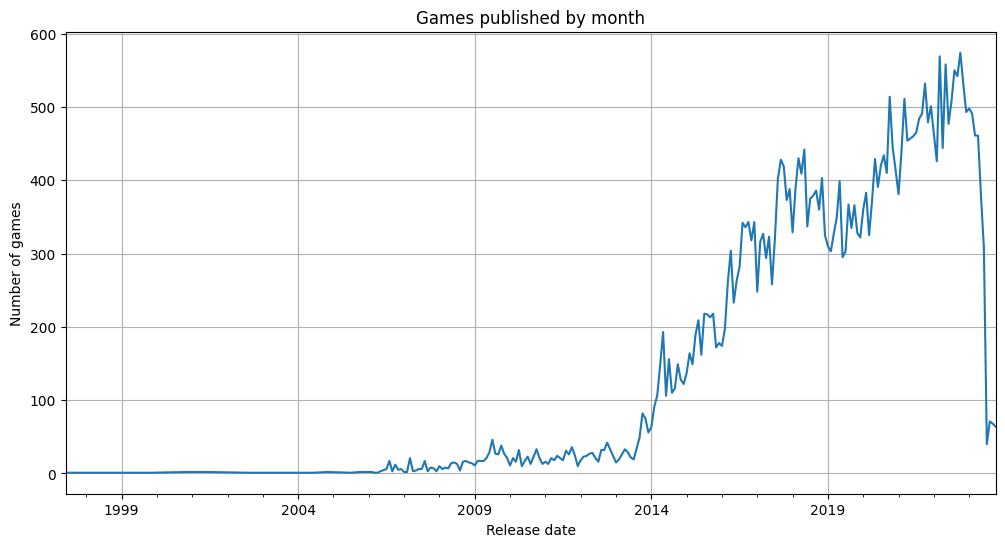

In [270]:
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

plt.figure(figsize=(12, 6))
df.groupby(df['Release date'].dt.to_period('M')).size().plot(kind='line')
plt.title('Games published by month')
plt.ylabel('Number of games')
plt.grid(True)
plt.show()

### PRICE

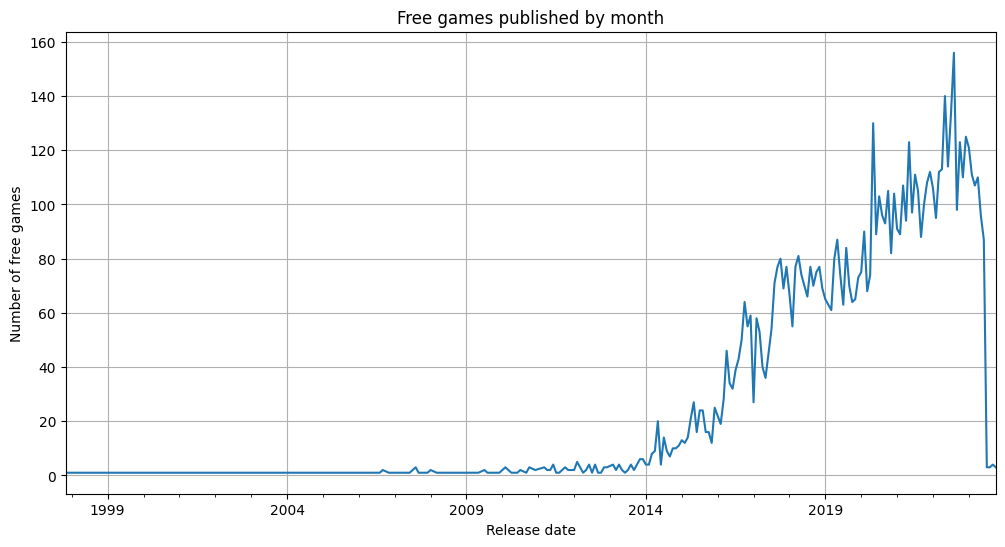

In [271]:
plt.figure(figsize=(12, 6))
df[df['Price final'] == 0].groupby(df['Release date'].dt.to_period('M')).size().plot(kind='line')
plt.title('Free games published by month')
plt.ylabel('Number of free games')
plt.grid(True)
plt.show()

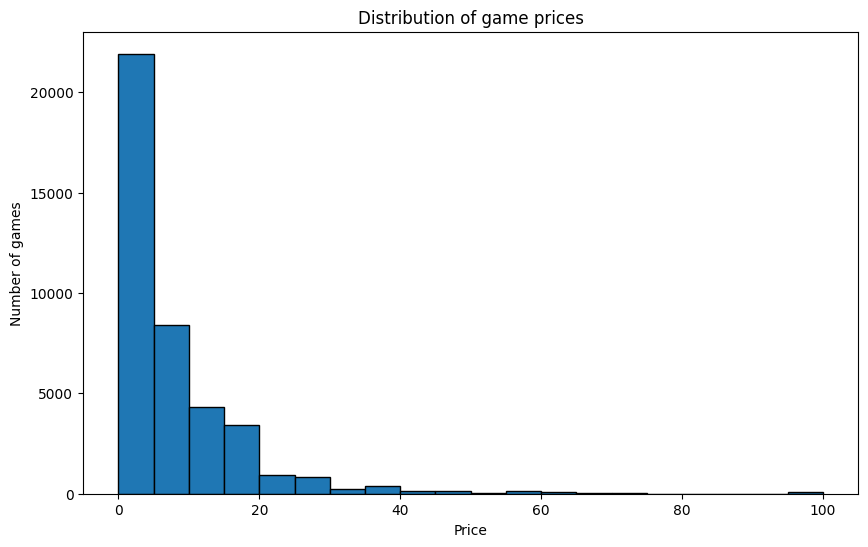

In [272]:
bins = range(0, 105, 5)
plt.figure(figsize=(10, 6))
plt.hist(df['Price final'], bins=bins, edgecolor='black')
plt.title('Distribution of game prices')
plt.xlabel('Price')
plt.ylabel('Number of games')
plt.show()

In [273]:
print("Free games: ", df[df['Price final'] == 0].shape[0])
print("Paid games: ", df[df['Price final'] > 0].shape[0])
print("Percentage of free games: ", round(df[df['Price final'] == 0].shape[0] / df.shape[0], 2) * 100)
print("Percentage of paid games: ", round(df[df['Price final'] > 0].shape[0] / df.shape[0], 2) * 100)

Free games:  7748
Paid games:  33422
Percentage of free games:  19.0
Percentage of paid games:  81.0


In [274]:
print("Free games: ", df[df['Price original'] == 0].shape[0])
print("Paid games: ", df[df['Price original'] > 0].shape[0])
print("Percentage of free games: ", round(df[df['Price original'] == 0].shape[0] / df.shape[0], 2) * 100)
print("Percentage of paid games: ", round(df[df['Price original'] > 0].shape[0] / df.shape[0], 2) * 100)

Free games:  8554
Paid games:  32616
Percentage of free games:  21.0
Percentage of paid games:  79.0


In [275]:
print(df['Price original'].max())
df[df['Price original'] == df['Price original'].max()]

299.9


,App ID,Name,Required age,DLC count,Detailed description,About the game,Short description,Reviews,Windows,Mac,...,Peak CCU,Tags,Release date,rating,Positive ratio,user_reviews,Price final,Price original,Discount,Steam Deck
33552,253670,Aartform Curvy 3D 3.0,0,0,Curvy 3D 4 Curvy 3D 4 is out now! \\\ Aartform...,Curvy 3D 3.0 is an innovative sculpting progra...,Curvy 3D 3.0 is an innovative sculpting progra...,NaN,True,False,...,0,Animation & Modeling,2013-11-12,Mixed,69,39,299.9,299.9,0.0,True


### DLC

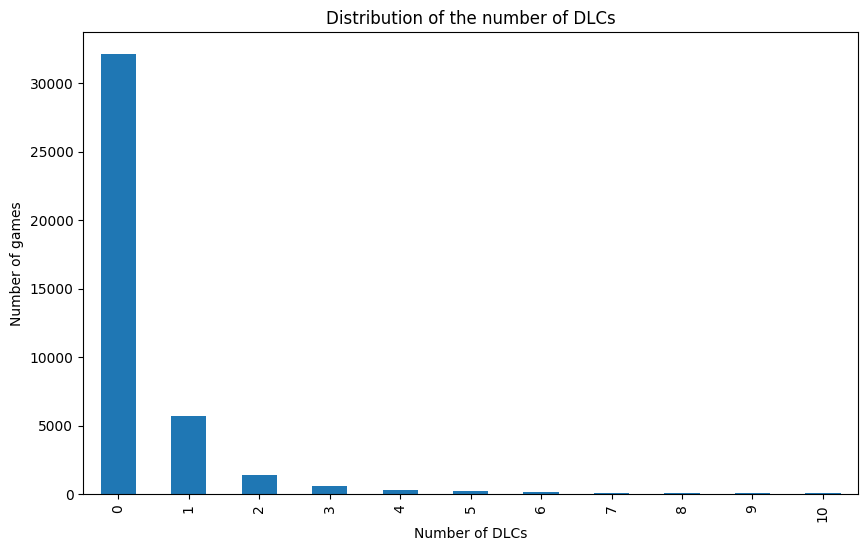

In [276]:
dlc_counts = df['DLC count'].value_counts().sort_index()
dlc_counts = dlc_counts[dlc_counts.index <= 10]
plt.figure(figsize=(10, 6))
dlc_counts.plot(kind='bar')
plt.title('Distribution of the number of DLCs')
plt.xlabel('Number of DLCs')
plt.ylabel('Number of games')
plt.show()

In [277]:
df[df['DLC count'] == df['DLC count'].max()].head()

,App ID,Name,Required age,DLC count,Detailed description,About the game,Short description,Reviews,Windows,Mac,...,Peak CCU,Tags,Release date,rating,Positive ratio,user_reviews,Price final,Price original,Discount,Steam Deck
19198,1196310,Fantasy Grounds Unity,0,2366,Featured DLC / D&amp;D Essentials D&amp;D Adve...,Prep Less. Play Better. Fantasy Grounds is kno...,Prep Less. Play Better. Exciting upgrades awai...,NaN,True,True,...,145,"RPG,Dungeons & Dragons,Strategy,Indie,Software...",2020-11-05,Very Positive,83,527,30.0,0.0,0.0,True


## PRE-PROCESSING

In [278]:
df = pd.read_csv('data/merged_steam_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [279]:
selected_columns = [
    'Release date', 'Price original', 'DLC count', 'Required age', 'Windows', 'Mac', 'Linux', 'Steam Deck',
    'Supported languages', 'Full audio languages', 'Developers', 'Publishers',
    'Movies', 'rating', 'Positive ratio', 'Genres', 'Tags', 'Categories', 'Achievements', 'Recommendations'
]

df_filtered = df[selected_columns]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          41170 non-null  object 
 1   Price original        41170 non-null  float64
 2   DLC count             41170 non-null  int64  
 3   Required age          41170 non-null  int64  
 4   Windows               41170 non-null  bool   
 5   Mac                   41170 non-null  bool   
 6   Linux                 41170 non-null  bool   
 7   Steam Deck            41170 non-null  bool   
 8   Supported languages   41157 non-null  object 
 9   Full audio languages  19288 non-null  object 
 10  Developers            41096 non-null  object 
 11  Publishers            40949 non-null  object 
 12  Movies                39366 non-null  object 
 13  rating                41170 non-null  object 
 14  Positive ratio        41170 non-null  int64  
 15  Genres             

In [280]:
dev_counts = df_filtered.groupby('Developers').agg(
    count=('Developers', 'count'),
    mean_positive_ratio=('Positive ratio', 'mean')
).reset_index()

dev_counts_sorted = dev_counts.sort_values(['count', 'mean_positive_ratio'], ascending=[False, False])
top_10k_developers = dev_counts_sorted.head(10000)['Developers'].tolist()

df_filtered = df_filtered[df_filtered['Developers'].isin(top_10k_developers)]

pub_counts = df_filtered.groupby('Publishers').agg(
    count=('Publishers', 'count'),
    mean_positive_ratio=('Positive ratio', 'mean')
).reset_index()

pub_counts_sorted = pub_counts.sort_values(['count', 'mean_positive_ratio'], ascending=[False, False])
top_10k_publishers = pub_counts_sorted.head(10000)['Publishers'].tolist()

df_filtered = df_filtered[df_filtered['Publishers'].isin(top_10k_publishers)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25512 entries, 1 to 41168
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          25512 non-null  object 
 1   Price original        25512 non-null  float64
 2   DLC count             25512 non-null  int64  
 3   Required age          25512 non-null  int64  
 4   Windows               25512 non-null  bool   
 5   Mac                   25512 non-null  bool   
 6   Linux                 25512 non-null  bool   
 7   Steam Deck            25512 non-null  bool   
 8   Supported languages   25511 non-null  object 
 9   Full audio languages  11616 non-null  object 
 10  Developers            25512 non-null  object 
 11  Publishers            25512 non-null  object 
 12  Movies                24251 non-null  object 
 13  rating                25512 non-null  object 
 14  Positive ratio        25512 non-null  int64  
 15  Genres                25

In [281]:
df_filtered.to_csv("data/top_10_k.csv", index=False)

In [282]:
from sklearn.model_selection import train_test_split

X = df_filtered.drop(columns=['rating'])
y = df_filtered['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [283]:
train = pd.concat([X_train, y_train], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17858 entries, 12993 to 38280
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          17858 non-null  object 
 1   Price original        17858 non-null  float64
 2   DLC count             17858 non-null  int64  
 3   Required age          17858 non-null  int64  
 4   Windows               17858 non-null  bool   
 5   Mac                   17858 non-null  bool   
 6   Linux                 17858 non-null  bool   
 7   Steam Deck            17858 non-null  bool   
 8   Supported languages   17857 non-null  object 
 9   Full audio languages  8186 non-null   object 
 10  Developers            17858 non-null  object 
 11  Publishers            17858 non-null  object 
 12  Movies                16945 non-null  object 
 13  Positive ratio        17858 non-null  int64  
 14  Genres                17844 non-null  object 
 15  Tags                

In [284]:
test = pd.concat([X_test, y_test], axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7654 entries, 19860 to 40177
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          7654 non-null   object 
 1   Price original        7654 non-null   float64
 2   DLC count             7654 non-null   int64  
 3   Required age          7654 non-null   int64  
 4   Windows               7654 non-null   bool   
 5   Mac                   7654 non-null   bool   
 6   Linux                 7654 non-null   bool   
 7   Steam Deck            7654 non-null   bool   
 8   Supported languages   7654 non-null   object 
 9   Full audio languages  3430 non-null   object 
 10  Developers            7654 non-null   object 
 11  Publishers            7654 non-null   object 
 12  Movies                7306 non-null   object 
 13  Positive ratio        7654 non-null   int64  
 14  Genres                7643 non-null   object 
 15  Tags                 

In [285]:
missing_values = train.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / train.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

,Missing Values,Percentage
Full audio languages,9672,54.160600
Tags,1364,7.638033
Movies,913,5.112555
Categories,204,1.142345
Genres,14,0.078396
Supported languages,1,0.005600


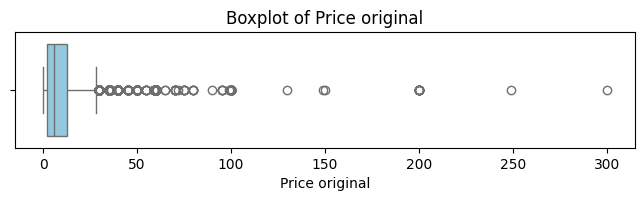

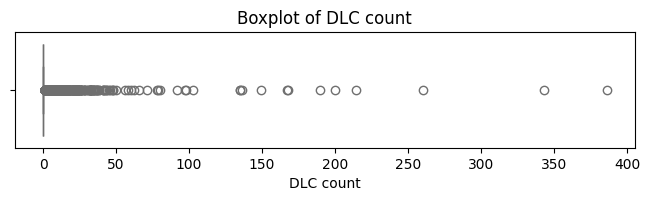

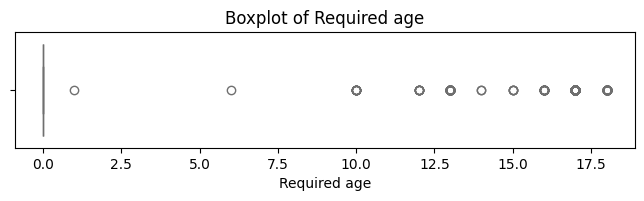

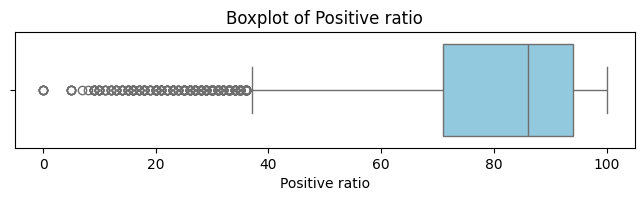

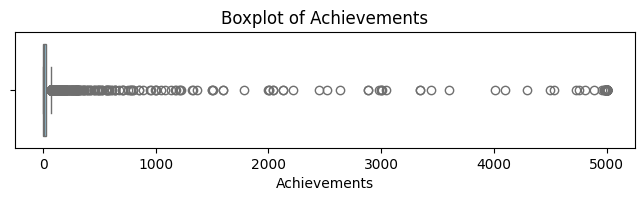

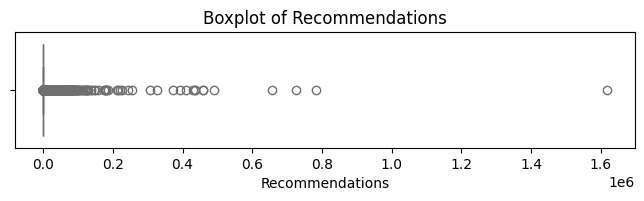

In [286]:
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=train[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [287]:
for col in num_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)][col]
    print(f"{col}: {outliers.count()} outliers ({100 * outliers.count() / train.shape[0]:.2f}%)")

Price original: 1046 outliers (5.86%)
DLC count: 4352 outliers (24.37%)
Required age: 542 outliers (3.04%)
Positive ratio: 436 outliers (2.44%)
Achievements: 970 outliers (5.43%)
Recommendations: 2824 outliers (15.81%)


In [288]:
train['Required age'].sort_values(ascending=True).unique()

array([ 0,  1,  6, 10, 12, 13, 14, 15, 16, 17, 18], dtype=int64)

In [289]:
train['Required age'].value_counts()

Required age
0     17316
17      365
13       67
18       62
16       23
10       10
12        7
15        4
14        2
6         1
1         1
Name: count, dtype: int64

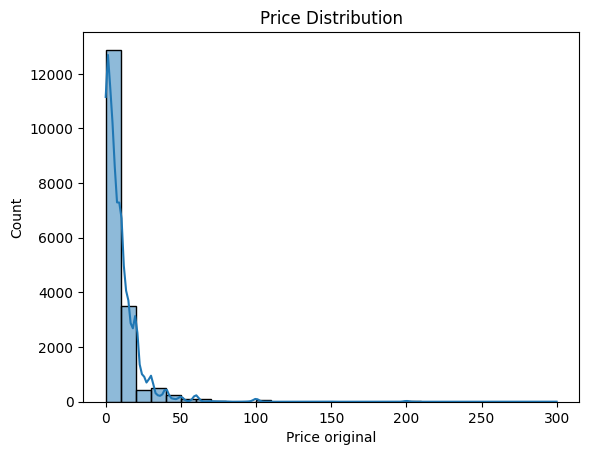

In [290]:
sns.histplot(train['Price original'].dropna(), kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

In [291]:
print(train['Price original'].describe())

count    17858.000000
mean         9.397767
std         12.668765
min          0.000000
25%          1.990000
50%          5.990000
75%         12.990000
max        299.900000
Name: Price original, dtype: float64


In [292]:
Q1 = train['Price original'].quantile(0.25)
Q3 = train['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
train[(train['Price original'] < lower) | (train['Price original'] > upper)].sort_values(by='Price original', ascending=False).head(15)

,Release date,Price original,DLC count,Required age,Windows,Mac,Linux,Steam Deck,Supported languages,Full audio languages,Developers,Publishers,Movies,Positive ratio,Genres,Tags,Categories,Achievements,Recommendations,rating
33552,2013-11-12,299.90,0,0,True,False,False,True,English,NaN,Aartform,Aartform,http://cdn.akamai.steamstatic.com/steam/apps/2...,69,Animation & Modeling,Animation & Modeling,Single-player,0,0,Mixed
37546,2022-11-01,249.00,0,0,True,False,False,True,"English,French,German,Spanish - Spain",NaN,MAGIX Software GmbH,MAGIX Software GmbH,http://cdn.akamai.steamstatic.com/steam/apps/2...,66,Video Production,"Video Production,Software",NaN,0,0,Mixed
39674,2023-03-22,199.99,0,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,Aztech,"Azerbaijan Technology,Aztech",http://cdn.akamai.steamstatic.com/steam/apps/2...,100,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",6,0,Positive
33133,2016-02-02,199.99,0,0,True,False,False,True,"English,Italian,Japanese,Simplified Chinese,Ge...",NaN,3Dflow SRL,3Dflow SRL,http://cdn.akamai.steamstatic.com/steam/apps/2...,96,"Animation & Modeling,Design & Illustration,Vid...","Video Production,Animation & Modeling,Design &...",Steam Trading Cards,0,0,Very Positive
38224,2022-12-17,199.99,0,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,Top-Down Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,75,"Action,Adventure,Casual,Indie,RPG,Simulation,S...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",6,0,Mostly Positive
7116,2021-09-09,199.99,0,0,True,False,False,True,"English,French,German,Spanish - Spain",NaN,MAGIX Software GmbH,MAGIX Software GmbH,http://cdn.akamai.steamstatic.com/steam/apps/2...,75,Video Production,"Video Production,Psychological Horror",NaN,0,0,Mostly Positive
36855,2022-09-28,199.99,0,0,True,False,False,True,English,NaN,"Atomic Fabrik,Cristian Manolachi","Atomic Fabrik,Cristian Manolachi",http://cdn.akamai.steamstatic.com/steam/apps/2...,83,"Adventure,Casual,Indie,Simulation,Strategy","Strategy,Adventure,Casual,Simulation,Singlepla...","Single-player,Partial Controller Support,Remot...",0,0,Positive
39277,2023-02-21,199.99,0,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,Top-Down Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,78,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",6,0,Mostly Positive
40478,2023-05-23,199.99,0,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,PUZZLE Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,100,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",6,0,Positive
39621,2023-03-23,199.99,0,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,Top-Down Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,90,"Action,Adventure,Casual,Indie,Massively Multip...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",6,0,Positive


In [293]:
def parse_tags(tags):
    if pd.isna(tags):
        return []
    return [tag.strip() for tag in tags.split(',')]

unique_tags = set()
for tags in train['Tags'].dropna():
    parsed_tags = parse_tags(tags)
    unique_tags.update(parsed_tags)

unique_tags_list = sorted(unique_tags)
print("Unique Tags:")
for tag in unique_tags_list:
    print(tag)

Unique Tags:
1980s
1990's
2.5D
2D
2D Fighter
2D Platformer
360 Video
3D
3D Fighter
3D Platformer
3D Vision
4 Player Local
4X
6DOF
8-bit Music
ATV
Abstract
Action
Action RPG
Action RTS
Action Roguelike
Action-Adventure
Addictive
Adventure
Agriculture
Aliens
Alternate History
Ambient
America
Animation & Modeling
Anime
Arcade
Archery
Arena Shooter
Artificial Intelligence
Assassin
Asymmetric VR
Asynchronous Multiplayer
Atmospheric
Audio Production
Auto Battler
Automation
Automobile Sim
BMX
Base-Building
Baseball
Based On A Novel
Basketball
Battle Royale
Beat 'em up
Beautiful
Benchmark
Bikes
Blood
Board Game
Boss Rush
Bowling
Boxing
Building
Bullet Hell
Bullet Time
CRPG
Capitalism
Card Battler
Card Game
Cartoon
Cartoony
Casual
Cats
Character Action Game
Character Customization
Chess
Choices Matter
Choose Your Own Adventure
Cinematic
City Builder
Class-Based
Classic
Clicker
Co-op
Co-op Campaign
Cold War
Collectathon
Colony Sim
Colorful
Combat
Combat Racing
Comedy
Comic Book
Competitive
Consp

In [294]:
def parse_genres(genres):
    if pd.isna(genres):
        return []
    return [genre.strip() for genre in genres.split(',')]

unique_genres = set()
for genres in train['Genres'].dropna():
    parsed_genres = parse_genres(genres)
    unique_genres.update(parsed_genres)

unique_genres_list = sorted(unique_genres)
print("Unique Genres:")
for genre in unique_genres_list:
    print(genre)

Unique Genres:
Accounting
Action
Adventure
Animation & Modeling
Audio Production
Casual
Design & Illustration
Early Access
Education
Free to Play
Game Development
Gore
Indie
Massively Multiplayer
Nudity
Photo Editing
RPG
Racing
Sexual Content
Simulation
Software Training
Sports
Strategy
Utilities
Video Production
Violent
Web Publishing


In [295]:
def parse_categories(categories):
    if pd.isna(categories):
        return []
    return [category.strip() for category in categories.split(',')]

unique_categories = set()
for categories in train['Categories'].dropna():
    parsed_categories = parse_categories(categories)
    unique_categories.update(parsed_categories)
    
unique_categories_list = sorted(unique_categories)
print("Unique Categories:")
for category in unique_categories_list:
    print(category)

Unique Categories:
Captions available
Co-op
Commentary available
Cross-Platform Multiplayer
Full controller support
HDR available
In-App Purchases
Includes Source SDK
Includes level editor
LAN Co-op
LAN PvP
MMO
Multi-player
Online Co-op
Online PvP
Partial Controller Support
PvP
Remote Play Together
Remote Play on Phone
Remote Play on TV
Remote Play on Tablet
Shared/Split Screen
Shared/Split Screen Co-op
Shared/Split Screen PvP
Single-player
Stats
Steam Achievements
Steam Cloud
Steam Leaderboards
Steam Trading Cards
Steam Turn Notifications
Steam Workshop
SteamVR Collectibles
Tracked Controller Support
VR Only
VR Support
VR Supported
Valve Anti-Cheat enabled


In [296]:
col_to_clean = ['Supported languages', 'Genres', 'Developers', 'Publishers', 'Categories']
train.dropna(subset=col_to_clean, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17643 entries, 12993 to 38280
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          17643 non-null  object 
 1   Price original        17643 non-null  float64
 2   DLC count             17643 non-null  int64  
 3   Required age          17643 non-null  int64  
 4   Windows               17643 non-null  bool   
 5   Mac                   17643 non-null  bool   
 6   Linux                 17643 non-null  bool   
 7   Steam Deck            17643 non-null  bool   
 8   Supported languages   17643 non-null  object 
 9   Full audio languages  8136 non-null   object 
 10  Developers            17643 non-null  object 
 11  Publishers            17643 non-null  object 
 12  Movies                16741 non-null  object 
 13  Positive ratio        17643 non-null  int64  
 14  Genres                17643 non-null  object 
 15  Tags                

In [297]:
train['Has full audio'] = train['Full audio languages'].notnull().map({True: 1, False: 0})
train.drop(columns=['Full audio languages'], inplace=True)

train['Has movie'] = train['Movies'].notnull().map({True: 1, False: 0})
train.drop(columns=['Movies'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17643 entries, 12993 to 38280
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         17643 non-null  object 
 1   Price original       17643 non-null  float64
 2   DLC count            17643 non-null  int64  
 3   Required age         17643 non-null  int64  
 4   Windows              17643 non-null  bool   
 5   Mac                  17643 non-null  bool   
 6   Linux                17643 non-null  bool   
 7   Steam Deck           17643 non-null  bool   
 8   Supported languages  17643 non-null  object 
 9   Developers           17643 non-null  object 
 10  Publishers           17643 non-null  object 
 11  Positive ratio       17643 non-null  int64  
 12  Genres               17643 non-null  object 
 13  Tags                 16297 non-null  object 
 14  Categories           17643 non-null  object 
 15  Achievements         17643 non-null  

In [298]:
def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

train['Required age category'] = train['Required age'].apply(age_category)
train.drop(columns=['Required age'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17643 entries, 12993 to 38280
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           17643 non-null  object 
 1   Price original         17643 non-null  float64
 2   DLC count              17643 non-null  int64  
 3   Windows                17643 non-null  bool   
 4   Mac                    17643 non-null  bool   
 5   Linux                  17643 non-null  bool   
 6   Steam Deck             17643 non-null  bool   
 7   Supported languages    17643 non-null  object 
 8   Developers             17643 non-null  object 
 9   Publishers             17643 non-null  object 
 10  Positive ratio         17643 non-null  int64  
 11  Genres                 17643 non-null  object 
 12  Tags                   16297 non-null  object 
 13  Categories             17643 non-null  object 
 14  Achievements           17643 non-null  int64  
 15  Rec

In [299]:
train['Required age category'].value_counts()

Required age category
Everyone    17120
Teen          461
Adult          62
Name: count, dtype: int64

In [300]:
software_keywords = ['Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing', 'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training']
mask = train['Genres'].str.contains('|'.join(software_keywords), na=False) | train['Tags'].str.contains('|'.join(software_keywords), na=False)
train_games_only = train[~mask].copy()
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17402 entries, 12993 to 38280
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           17402 non-null  object 
 1   Price original         17402 non-null  float64
 2   DLC count              17402 non-null  int64  
 3   Windows                17402 non-null  bool   
 4   Mac                    17402 non-null  bool   
 5   Linux                  17402 non-null  bool   
 6   Steam Deck             17402 non-null  bool   
 7   Supported languages    17402 non-null  object 
 8   Developers             17402 non-null  object 
 9   Publishers             17402 non-null  object 
 10  Positive ratio         17402 non-null  int64  
 11  Genres                 17402 non-null  object 
 12  Tags                   16061 non-null  object 
 13  Categories             17402 non-null  object 
 14  Achievements           17402 non-null  int64  
 15  Rec

In [301]:
Q1 = train_games_only['Price original'].quantile(0.25)
Q3 = train_games_only['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = train_games_only[(train_games_only['Price original'] < lower_bound) | (train_games_only['Price original'] > upper_bound)]
print(f"Outliers count: {outliers.shape[0]}")

train_games_only = train_games_only[~((train_games_only['Price original'] < lower_bound) | (train_games_only['Price original'] > upper_bound))]
train_games_only.info()

Outliers count: 973
<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           16429 non-null  object 
 1   Price original         16429 non-null  float64
 2   DLC count              16429 non-null  int64  
 3   Windows                16429 non-null  bool   
 4   Mac                    16429 non-null  bool   
 5   Linux                  16429 non-null  bool   
 6   Steam Deck             16429 non-null  bool   
 7   Supported languages    16429 non-null  object 
 8   Developers             16429 non-null  object 
 9   Publishers             16429 non-null  object 
 10  Positive ratio         16429 non-null  int64  
 11  Genres                 16429 non-null  object 
 12  Tags                   15176 non-null  object 
 13  Categories             16429 non-null  object 
 14  Achievements           16429 non-nu

In [302]:
train_games_only['Has DLC'] = np.where(train_games_only['DLC count'] > 0, 1, 0)
train_games_only.drop(columns=['DLC count'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           16429 non-null  object 
 1   Price original         16429 non-null  float64
 2   Windows                16429 non-null  bool   
 3   Mac                    16429 non-null  bool   
 4   Linux                  16429 non-null  bool   
 5   Steam Deck             16429 non-null  bool   
 6   Supported languages    16429 non-null  object 
 7   Developers             16429 non-null  object 
 8   Publishers             16429 non-null  object 
 9   Positive ratio         16429 non-null  int64  
 10  Genres                 16429 non-null  object 
 11  Tags                   15176 non-null  object 
 12  Categories             16429 non-null  object 
 13  Achievements           16429 non-null  int64  
 14  Recommendations        16429 non-null  int64  
 15  rat

In [303]:
from datetime import datetime


train_games_only['Release date'] = pd.to_datetime(train_games_only['Release date'], errors='coerce')

train_games_only = train_games_only.dropna(subset=['Release date'])

train_games_only['Release Year'] = train_games_only['Release date'].dt.year
train_games_only['Game Age'] = datetime.now().year - train_games_only['Release Year']

train_games_only = train_games_only.drop(columns=['Release date'])

train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         16429 non-null  float64
 1   Windows                16429 non-null  bool   
 2   Mac                    16429 non-null  bool   
 3   Linux                  16429 non-null  bool   
 4   Steam Deck             16429 non-null  bool   
 5   Supported languages    16429 non-null  object 
 6   Developers             16429 non-null  object 
 7   Publishers             16429 non-null  object 
 8   Positive ratio         16429 non-null  int64  
 9   Genres                 16429 non-null  object 
 10  Tags                   15176 non-null  object 
 11  Categories             16429 non-null  object 
 12  Achievements           16429 non-null  int64  
 13  Recommendations        16429 non-null  int64  
 14  rating                 16429 non-null  object 
 15  Has

In [304]:
train_games_only['languages_count'] = train_games_only['Supported languages'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         16429 non-null  float64
 1   Windows                16429 non-null  bool   
 2   Mac                    16429 non-null  bool   
 3   Linux                  16429 non-null  bool   
 4   Steam Deck             16429 non-null  bool   
 5   Supported languages    16429 non-null  object 
 6   Developers             16429 non-null  object 
 7   Publishers             16429 non-null  object 
 8   Positive ratio         16429 non-null  int64  
 9   Genres                 16429 non-null  object 
 10  Tags                   15176 non-null  object 
 11  Categories             16429 non-null  object 
 12  Achievements           16429 non-null  int64  
 13  Recommendations        16429 non-null  int64  
 14  rating                 16429 non-null  object 
 15  Has

In [305]:
train_games_only['Language_english'] = train_games_only['Supported languages'].apply(lambda x: 1 if 'english' in x.lower() else 0)

train_games_only['Language_english'].value_counts()

Language_english
1    15863
0      566
Name: count, dtype: int64

In [306]:
train_games_only.drop(columns=['Supported languages'], inplace=True)

train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         16429 non-null  float64
 1   Windows                16429 non-null  bool   
 2   Mac                    16429 non-null  bool   
 3   Linux                  16429 non-null  bool   
 4   Steam Deck             16429 non-null  bool   
 5   Developers             16429 non-null  object 
 6   Publishers             16429 non-null  object 
 7   Positive ratio         16429 non-null  int64  
 8   Genres                 16429 non-null  object 
 9   Tags                   15176 non-null  object 
 10  Categories             16429 non-null  object 
 11  Achievements           16429 non-null  int64  
 12  Recommendations        16429 non-null  int64  
 13  rating                 16429 non-null  object 
 14  Has full audio         16429 non-null  int64  
 15  Has

In [307]:
train_games_only['Platform_count'] = train_games_only[['Windows', 'Mac', 'Linux']].sum(axis=1)

train_games_only['Platform_count'].value_counts()

Platform_count
1    11356
3     2627
2     2446
Name: count, dtype: int64

In [308]:
train_games_only['Mac'] = train_games_only['Mac'].astype(int)
train_games_only['Linux'] = train_games_only['Linux'].astype(int)
train_games_only['Windows'] = train_games_only['Windows'].astype(int)
train_games_only['Steam Deck'] = train_games_only['Steam Deck'].astype(int)

In [309]:
from sklearn.preprocessing import LabelEncoder

developer_encoder = LabelEncoder()
train_games_only['Developers_code'] = developer_encoder.fit_transform(train_games_only['Developers'])

publisher_encoder = LabelEncoder()
train_games_only['Publishers_code'] = publisher_encoder.fit_transform(train_games_only['Publishers'])

train_games_only.drop(columns=['Developers', 'Publishers'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         16429 non-null  float64
 1   Windows                16429 non-null  int32  
 2   Mac                    16429 non-null  int32  
 3   Linux                  16429 non-null  int32  
 4   Steam Deck             16429 non-null  int32  
 5   Positive ratio         16429 non-null  int64  
 6   Genres                 16429 non-null  object 
 7   Tags                   15176 non-null  object 
 8   Categories             16429 non-null  object 
 9   Achievements           16429 non-null  int64  
 10  Recommendations        16429 non-null  int64  
 11  rating                 16429 non-null  object 
 12  Has full audio         16429 non-null  int64  
 13  Has movie              16429 non-null  int64  
 14  Required age category  16429 non-null  object 
 15  Has

In [310]:
required_age_encoder = LabelEncoder()
train_games_only['Required age category_code'] = required_age_encoder.fit_transform(train_games_only['Required age category'])

train_games_only.drop(columns=['Required age category'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price original              16429 non-null  float64
 1   Windows                     16429 non-null  int32  
 2   Mac                         16429 non-null  int32  
 3   Linux                       16429 non-null  int32  
 4   Steam Deck                  16429 non-null  int32  
 5   Positive ratio              16429 non-null  int64  
 6   Genres                      16429 non-null  object 
 7   Tags                        15176 non-null  object 
 8   Categories                  16429 non-null  object 
 9   Achievements                16429 non-null  int64  
 10  Recommendations             16429 non-null  int64  
 11  rating                      16429 non-null  object 
 12  Has full audio              16429 non-null  int64  
 13  Has movie                   1642

In [311]:
top5_genres = train_games_only['Genres'].str.split(',').explode().value_counts()
top5_genres = top5_genres.head(5).index.tolist()

for genre in top5_genres:
    train_games_only[f'Genre_{genre}'] = train_games_only['Genres'].str.contains(genre, case=False, na=False).astype(int)

train_games_only.drop(columns=['Genres'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price original              16429 non-null  float64
 1   Windows                     16429 non-null  int32  
 2   Mac                         16429 non-null  int32  
 3   Linux                       16429 non-null  int32  
 4   Steam Deck                  16429 non-null  int32  
 5   Positive ratio              16429 non-null  int64  
 6   Tags                        15176 non-null  object 
 7   Categories                  16429 non-null  object 
 8   Achievements                16429 non-null  int64  
 9   Recommendations             16429 non-null  int64  
 10  rating                      16429 non-null  object 
 11  Has full audio              16429 non-null  int64  
 12  Has movie                   16429 non-null  int64  
 13  Has DLC                     1642

In [312]:
top5_tags = train_games_only['Tags'].str.split(',').explode().value_counts()
top5_tags = top5_tags.head(5).index.tolist()

print(f"Top 5 Tags: {top5_tags}")

Top 5 Tags: ['Indie', 'Singleplayer', 'Adventure', 'Casual', 'Action']


In [313]:
top5_categories = train_games_only['Categories'].str.split(',').explode().value_counts()
top5_categories = top5_categories.head(5).index.tolist()

print(f"Top 5 Categories: {top5_categories}")

for category in top5_categories:
    train_games_only[f'Category_{category}'] = train_games_only['Categories'].str.contains(category, case=False, na=False).astype(int)

train_games_only.info()

Top 5 Categories: ['Single-player', 'Steam Achievements', 'Steam Cloud', 'Full controller support', 'Steam Trading Cards']
<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price original                    16429 non-null  float64
 1   Windows                           16429 non-null  int32  
 2   Mac                               16429 non-null  int32  
 3   Linux                             16429 non-null  int32  
 4   Steam Deck                        16429 non-null  int32  
 5   Positive ratio                    16429 non-null  int64  
 6   Tags                              15176 non-null  object 
 7   Categories                        16429 non-null  object 
 8   Achievements                      16429 non-null  int64  
 9   Recommendations                   16429 non-null  int64  
 10  rating  

In [314]:
col_to_clean = ['Supported languages', 'Genres', 'Developers', 'Publishers', 'Categories']
test.dropna(subset=col_to_clean, inplace=True)

test['Has full audio'] = test['Full audio languages'].notnull().map({True: 1, False: 0})
test.drop(columns=['Full audio languages'], inplace=True)

test['Has movie'] = test['Movies'].notnull().map({True: 1, False: 0})
test.drop(columns=['Movies'], inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7571 entries, 19860 to 40177
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         7571 non-null   object 
 1   Price original       7571 non-null   float64
 2   DLC count            7571 non-null   int64  
 3   Required age         7571 non-null   int64  
 4   Windows              7571 non-null   bool   
 5   Mac                  7571 non-null   bool   
 6   Linux                7571 non-null   bool   
 7   Steam Deck           7571 non-null   bool   
 8   Supported languages  7571 non-null   object 
 9   Developers           7571 non-null   object 
 10  Publishers           7571 non-null   object 
 11  Positive ratio       7571 non-null   int64  
 12  Genres               7571 non-null   object 
 13  Tags                 7026 non-null   object 
 14  Categories           7571 non-null   object 
 15  Achievements         7571 non-null   i

In [315]:
software_keywords = [
    'Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing',
    'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training'
]
mask = test['Genres'].str.contains('|'.join(software_keywords), na=False) | test['Tags'].str.contains('|'.join(software_keywords), na=False)
test_games_only = test[~mask].copy()

Q1 = test_games_only['Price original'].quantile(0.25)
Q3 = test_games_only['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
test_games_only = test_games_only[(test_games_only['Price original'] >= lower_bound) & (test_games_only['Price original'] <= upper_bound)]

In [316]:
from datetime import datetime

test_games_only['Has DLC'] = np.where(test_games_only['DLC count'] > 0, 1, 0)
test_games_only.drop(columns=['DLC count'], inplace=True)

def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

test_games_only['Required age category'] = test_games_only['Required age'].apply(age_category)
test_games_only.drop(columns=['Required age'], inplace=True)

test_games_only['Release date'] = pd.to_datetime(test_games_only['Release date'], errors='coerce')
test_games_only = test_games_only.dropna(subset=['Release date'])
test_games_only['Release Year'] = test_games_only['Release date'].dt.year
test_games_only['Game Age'] = datetime.now().year - test_games_only['Release Year']
test_games_only = test_games_only.drop(columns=['Release date'])

test_games_only['languages_count'] = test_games_only['Supported languages'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

test_games_only['Language_english'] = test_games_only['Supported languages'].apply(lambda x: 1 if 'english' in x.lower() else 0)
test_games_only['Language_english'].value_counts()

test_games_only.drop(columns=['Supported languages'], inplace=True)

In [317]:
test_games_only['Mac'] = test_games_only['Mac'].astype(int)
test_games_only['Linux'] = test_games_only['Linux'].astype(int)
test_games_only['Windows'] = test_games_only['Windows'].astype(int)
test_games_only['Steam Deck'] = test_games_only['Steam Deck'].astype(int)

test_games_only['Platform_count'] = test_games_only[['Windows', 'Mac', 'Linux']].sum(axis=1)
test_games_only['Platform_count'].value_counts()

Platform_count
1    4866
3    1148
2    1040
Name: count, dtype: int64

In [318]:
if 'Others' not in developer_encoder.classes_:
    developer_encoder.classes_ = np.append(developer_encoder.classes_, 'Others')
if 'Others' not in publisher_encoder.classes_:
    publisher_encoder.classes_ = np.append(publisher_encoder.classes_, 'Others')

test_games_only['Developers'] = test_games_only['Developers'].apply(lambda x: x if x in developer_encoder.classes_ else 'Others')
test_games_only['Publishers'] = test_games_only['Publishers'].apply(lambda x: x if x in publisher_encoder.classes_ else 'Others')

test_games_only['Developers_code'] = developer_encoder.transform(test_games_only['Developers'])
test_games_only['Publishers_code'] = publisher_encoder.transform(test_games_only['Publishers'])

test_games_only.drop(columns=['Developers', 'Publishers'], inplace=True)
test_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7054 entries, 21378 to 40177
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         7054 non-null   float64
 1   Windows                7054 non-null   int32  
 2   Mac                    7054 non-null   int32  
 3   Linux                  7054 non-null   int32  
 4   Steam Deck             7054 non-null   int32  
 5   Positive ratio         7054 non-null   int64  
 6   Genres                 7054 non-null   object 
 7   Tags                   6542 non-null   object 
 8   Categories             7054 non-null   object 
 9   Achievements           7054 non-null   int64  
 10  Recommendations        7054 non-null   int64  
 11  rating                 7054 non-null   object 
 12  Has full audio         7054 non-null   int64  
 13  Has movie              7054 non-null   int64  
 14  Has DLC                7054 non-null   int32  
 15  Requ

In [319]:
test_games_only['Required age category_code'] = required_age_encoder.transform(test_games_only['Required age category'])

test_games_only.drop(columns=['Required age category'], inplace=True)
test_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7054 entries, 21378 to 40177
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price original              7054 non-null   float64
 1   Windows                     7054 non-null   int32  
 2   Mac                         7054 non-null   int32  
 3   Linux                       7054 non-null   int32  
 4   Steam Deck                  7054 non-null   int32  
 5   Positive ratio              7054 non-null   int64  
 6   Genres                      7054 non-null   object 
 7   Tags                        6542 non-null   object 
 8   Categories                  7054 non-null   object 
 9   Achievements                7054 non-null   int64  
 10  Recommendations             7054 non-null   int64  
 11  rating                      7054 non-null   object 
 12  Has full audio              7054 non-null   int64  
 13  Has movie                   7054 

In [320]:
for genre in top5_genres:
    test_games_only[f'Genre_{genre}'] = test_games_only['Genres'].str.contains(genre, case=False, na=False).astype(int)

test_games_only.drop(columns=['Genres'], inplace=True)

for category in top5_categories:
    test_games_only[f'Category_{category}'] = test_games_only['Categories'].str.contains(category, case=False, na=False).astype(int)

test_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7054 entries, 21378 to 40177
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price original                    7054 non-null   float64
 1   Windows                           7054 non-null   int32  
 2   Mac                               7054 non-null   int32  
 3   Linux                             7054 non-null   int32  
 4   Steam Deck                        7054 non-null   int32  
 5   Positive ratio                    7054 non-null   int64  
 6   Tags                              6542 non-null   object 
 7   Categories                        7054 non-null   object 
 8   Achievements                      7054 non-null   int64  
 9   Recommendations                   7054 non-null   int64  
 10  rating                            7054 non-null   object 
 11  Has full audio                    7054 non-null   int64  
 12  Has mo

In [321]:
train = train_games_only.copy()
test = test_games_only.copy() 

In [322]:
print(train['rating'].value_counts())

rating
Very Positive              5107
Positive                   4589
Mixed                      3168
Mostly Positive            2395
Overwhelmingly Positive     679
Mostly Negative             407
Negative                     68
Very Negative                13
Overwhelmingly Negative       3
Name: count, dtype: int64


In [323]:
print(test['rating'].value_counts())

rating
Very Positive              2159
Positive                   1995
Mixed                      1326
Mostly Positive            1064
Overwhelmingly Positive     280
Mostly Negative             189
Negative                     34
Very Negative                 5
Overwhelmingly Negative       2
Name: count, dtype: int64


In [324]:
def classify_rating(rating):
    if rating in ['Mostly Positive', 'Overwhelmingly Positive', 'Very Positive', 'Positive']:
        return 'positive'
    elif rating == 'Mixed':
        return 'negative'
    else:
        return 'negative'
    
train['rating'] = train['rating'].apply(classify_rating)
test['rating'] = test['rating'].apply(classify_rating)

<Axes: title={'center': 'Train Rating Distribution'}, xlabel='rating'>

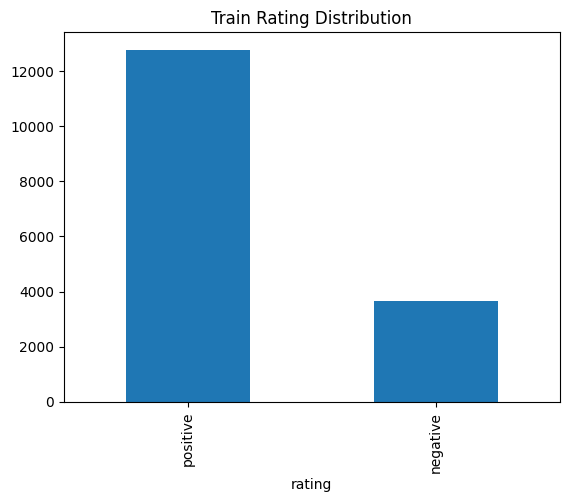

In [325]:
train['rating'].value_counts().plot(kind='bar', title='Train Rating Distribution')

<Axes: title={'center': 'Test Rating Distribution'}, xlabel='rating'>

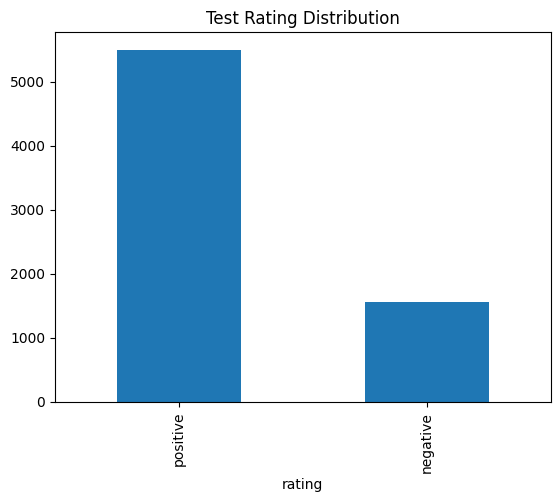

In [326]:
test['rating'].value_counts().plot(kind='bar', title='Test Rating Distribution')

In [327]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price original                    16429 non-null  float64
 1   Windows                           16429 non-null  int32  
 2   Mac                               16429 non-null  int32  
 3   Linux                             16429 non-null  int32  
 4   Steam Deck                        16429 non-null  int32  
 5   Positive ratio                    16429 non-null  int64  
 6   Tags                              15176 non-null  object 
 7   Categories                        16429 non-null  object 
 8   Achievements                      16429 non-null  int64  
 9   Recommendations                   16429 non-null  int64  
 10  rating                            16429 non-null  object 
 11  Has full audio                    16429 non-null  int64  
 12  Has m

In [328]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7054 entries, 21378 to 40177
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price original                    7054 non-null   float64
 1   Windows                           7054 non-null   int32  
 2   Mac                               7054 non-null   int32  
 3   Linux                             7054 non-null   int32  
 4   Steam Deck                        7054 non-null   int32  
 5   Positive ratio                    7054 non-null   int64  
 6   Tags                              6542 non-null   object 
 7   Categories                        7054 non-null   object 
 8   Achievements                      7054 non-null   int64  
 9   Recommendations                   7054 non-null   int64  
 10  rating                            7054 non-null   object 
 11  Has full audio                    7054 non-null   int64  
 12  Has mo

In [329]:
train.to_csv("data/modelling/train_processed.csv", index=False)
test.to_csv("data/modelling/test_processed.csv", index=False)

## MODELLING

### PREPARATION

In [330]:
train = pd.read_csv("data/modelling/train_processed.csv")
test = pd.read_csv("data/modelling/test_processed.csv")

In [331]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16429 entries, 0 to 16428
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price original                    16429 non-null  float64
 1   Windows                           16429 non-null  int64  
 2   Mac                               16429 non-null  int64  
 3   Linux                             16429 non-null  int64  
 4   Steam Deck                        16429 non-null  int64  
 5   Positive ratio                    16429 non-null  int64  
 6   Tags                              15176 non-null  object 
 7   Categories                        16429 non-null  object 
 8   Achievements                      16429 non-null  int64  
 9   Recommendations                   16429 non-null  int64  
 10  rating                            16429 non-null  object 
 11  Has full audio                    16429 non-null  int64  
 12  Has 

In [332]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7054 entries, 0 to 7053
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price original                    7054 non-null   float64
 1   Windows                           7054 non-null   int64  
 2   Mac                               7054 non-null   int64  
 3   Linux                             7054 non-null   int64  
 4   Steam Deck                        7054 non-null   int64  
 5   Positive ratio                    7054 non-null   int64  
 6   Tags                              6542 non-null   object 
 7   Categories                        7054 non-null   object 
 8   Achievements                      7054 non-null   int64  
 9   Recommendations                   7054 non-null   int64  
 10  rating                            7054 non-null   object 
 11  Has full audio                    7054 non-null   int64  
 12  Has mo

In [333]:
features = [
    'Price original', 
    'Has full audio', 'Has movie', 'Has DLC', 'Release Year',
    'languages_count', 'Developers_code', 'Publishers_code',
    'Language_english', 'Platform_count', 'Required age category_code',
    'Genre_Adventure', 'Genre_Casual', 'Genre_Indie', 
    'Category_Single-player', 'Category_Steam Achievements', 'Category_Steam Cloud'
]

X_train = train[features]
y_train = train['rating']
X_test = test[features]
y_test = test['rating']

<Axes: title={'center': 'Resampled Train Rating Distribution'}, xlabel='rating'>

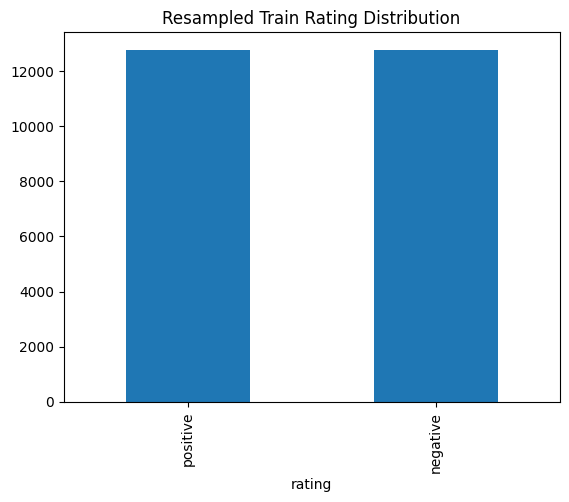

In [334]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

y_train_resampled.value_counts().plot(kind='bar', title='Resampled Train Rating Distribution')

In [335]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16429 entries, 0 to 16428
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price original               16429 non-null  float64
 1   Has full audio               16429 non-null  int64  
 2   Has movie                    16429 non-null  int64  
 3   Has DLC                      16429 non-null  int64  
 4   Release Year                 16429 non-null  int64  
 5   languages_count              16429 non-null  int64  
 6   Developers_code              16429 non-null  int64  
 7   Publishers_code              16429 non-null  int64  
 8   Language_english             16429 non-null  int64  
 9   Platform_count               16429 non-null  int64  
 10  Required age category_code   16429 non-null  int64  
 11  Genre_Adventure              16429 non-null  int64  
 12  Genre_Casual                 16429 non-null  int64  
 13  Genre_Indie     

In [336]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### MODEL 1 - LOGISTIC REGRESSION

=============== LOGISTIC REGRESSION - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.68      0.70      0.69     12770
    positive       0.69      0.67      0.68     12770

    accuracy                           0.68     25540
   macro avg       0.68      0.68      0.68     25540
weighted avg       0.68      0.68      0.68     25540



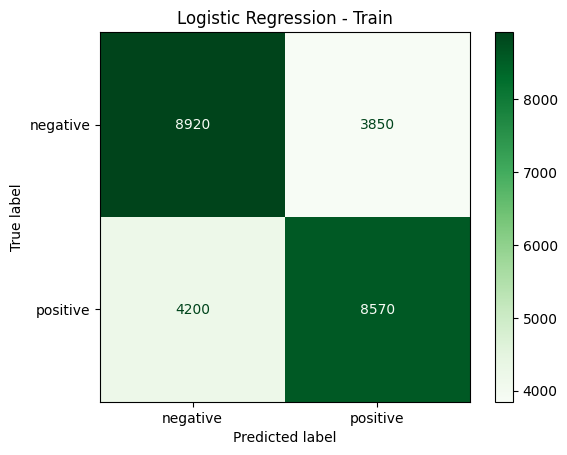

=============== LOGISTIC REGRESSION - TEST ===============
              precision    recall  f1-score   support

    negative       0.29      0.44      0.35      1556
    positive       0.81      0.69      0.75      5498

    accuracy                           0.64      7054
   macro avg       0.55      0.57      0.55      7054
weighted avg       0.70      0.64      0.66      7054



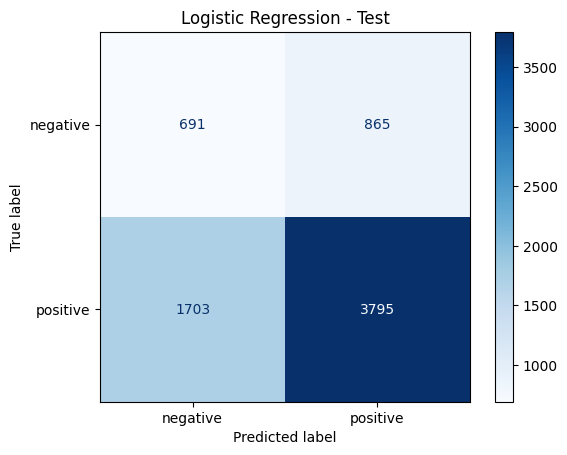

In [337]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train_resampled, y_train_resampled)

y_pred_train_logreg = model_logreg.predict(X_train_resampled)
y_pred_test_logreg = model_logreg.predict(X_test)

print("=============== LOGISTIC REGRESSION - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_logreg, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_logreg, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Logistic Regression - Train")
plt.show()

print("=============== LOGISTIC REGRESSION - TEST ===============")
print(classification_report(y_test, y_pred_test_logreg, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_logreg, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Logistic Regression - Test")
plt.show()


In [338]:
print("Highest iteration:", model_logreg.n_iter_)

Highest iteration: [109]


### MODEL 2 - DECISION TREE

=============== DECISION TREE - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.99      1.00      0.99     12770
    positive       1.00      0.99      0.99     12770

    accuracy                           0.99     25540
   macro avg       0.99      0.99      0.99     25540
weighted avg       0.99      0.99      0.99     25540



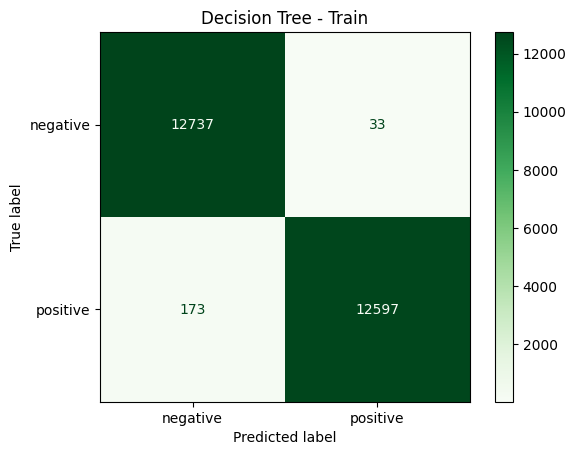

=============== DECISION TREE - TEST ===============
              precision    recall  f1-score   support

    negative       0.34      0.48      0.40      1556
    positive       0.83      0.74      0.78      5498

    accuracy                           0.68      7054
   macro avg       0.59      0.61      0.59      7054
weighted avg       0.72      0.68      0.70      7054



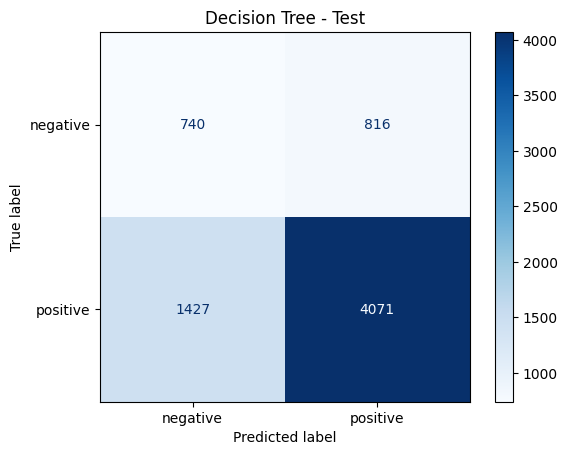

In [339]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_resampled, y_train_resampled)

y_pred_train_tree = model_tree.predict(X_train_resampled)
y_pred_test_tree = model_tree.predict(X_test)

print("=============== DECISION TREE - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_tree, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_tree, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Decision Tree - Train")
plt.show()

print("=============== DECISION TREE - TEST ===============")
print(classification_report(y_test, y_pred_test_tree, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_tree, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Decision Tree - Test")
plt.show()

### MODEL 3 - RANDOM FOREST

=============== RANDOM FOREST - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.99      0.99      0.99     12770
    positive       0.99      0.99      0.99     12770

    accuracy                           0.99     25540
   macro avg       0.99      0.99      0.99     25540
weighted avg       0.99      0.99      0.99     25540



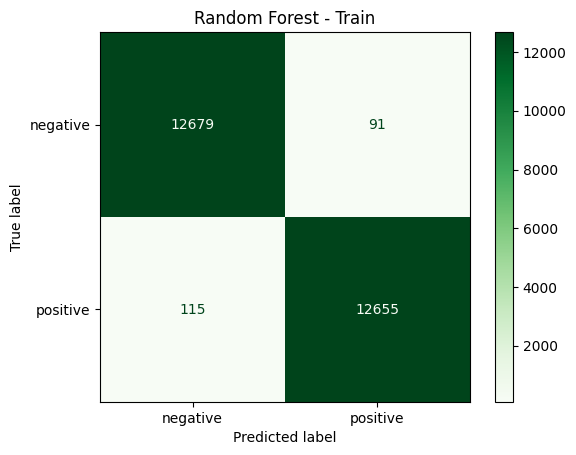

=============== RANDOM FOREST - TEST ===============
              precision    recall  f1-score   support

    negative       0.44      0.41      0.43      1556
    positive       0.84      0.85      0.84      5498

    accuracy                           0.76      7054
   macro avg       0.64      0.63      0.64      7054
weighted avg       0.75      0.76      0.75      7054



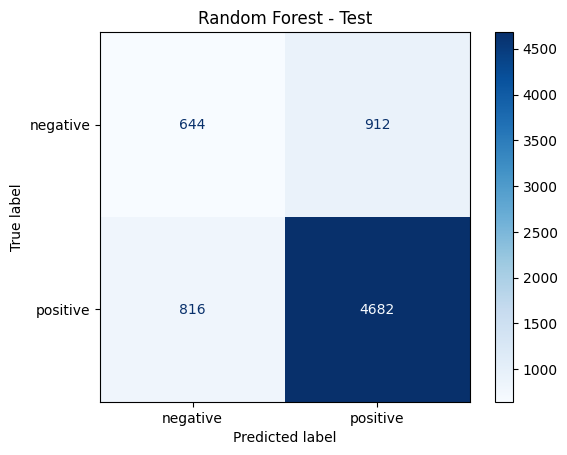

In [340]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

y_pred_train_rf = model_rf.predict(X_train_resampled)
y_pred_test_rf = model_rf.predict(X_test)

print("=============== RANDOM FOREST - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_rf, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_rf, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Random Forest - Train")
plt.show()

print("=============== RANDOM FOREST - TEST ===============")
print(classification_report(y_test, y_pred_test_rf, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_rf, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Random Forest - Test")
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits


d:\.STUDY\Cawu5\DM\CODE_FINAL\steam_games_analysis\.venv\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

=============== RANDOM FOREST (TUNED) - TEST ===============
              precision    recall  f1-score   support

    negative       0.40      0.50      0.45      1556
    positive       0.85      0.79      0.82      5498

    accuracy                           0.73      7054
   macro avg       0.63      0.64      0.63      7054
weighted avg       0.75      0.73      0.74      7054



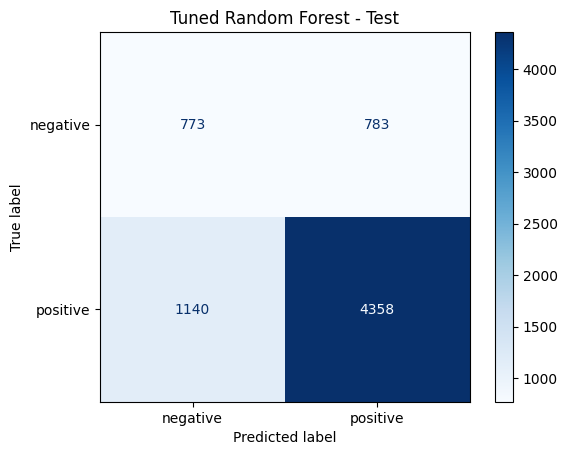

In [341]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='precision'
)

grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

y_pred_test_best_rf = best_rf_model.predict(X_test)

print("\n=============== RANDOM FOREST (TUNED) - TEST ===============")
print(classification_report(y_test, y_pred_test_best_rf, target_names=['negative', 'positive']))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_best_rf, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Tuned Random Forest - Test")
plt.show()

### MODEL 4 - KNN

=============== KNN - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.81      0.91      0.85     12770
    positive       0.90      0.78      0.83     12770

    accuracy                           0.84     25540
   macro avg       0.85      0.84      0.84     25540
weighted avg       0.85      0.84      0.84     25540



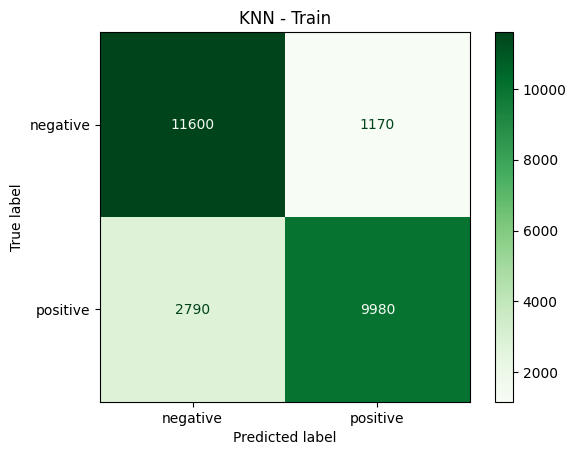

=============== KNN - TEST ===============
              precision    recall  f1-score   support

    negative       0.40      0.51      0.45      1556
    positive       0.85      0.78      0.81      5498

    accuracy                           0.72      7054
   macro avg       0.62      0.64      0.63      7054
weighted avg       0.75      0.72      0.73      7054



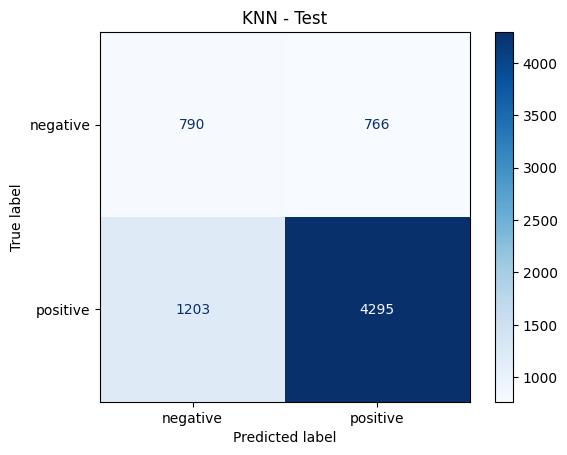

In [342]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_resampled, y_train_resampled)

y_pred_train_knn = model_knn.predict(X_train_resampled)
y_pred_test_knn = model_knn.predict(X_test)

print("=============== KNN - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_knn, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_knn, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("KNN - Train")
plt.show()

print("=============== KNN - TEST ===============")
print(classification_report(y_test, y_pred_test_knn, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_knn, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("KNN - Test")
plt.show()


Fitting 5 folds for each of 40 candidates, totalling 200 fits


d:\.STUDY\Cawu5\DM\CODE_FINAL\steam_games_analysis\.venv\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

=============== KNN (GRID SEARCH TUNED) - TEST ===============
              precision    recall  f1-score   support

    negative       0.42      0.45      0.43      1556
    positive       0.84      0.82      0.83      5498

    accuracy                           0.74      7054
   macro avg       0.63      0.63      0.63      7054
weighted avg       0.75      0.74      0.74      7054



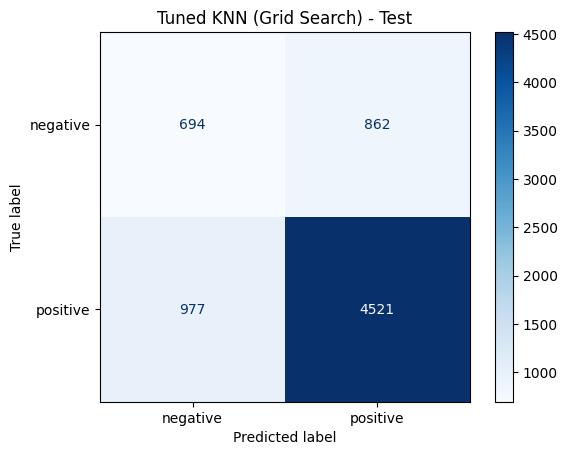

In [343]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': list(range(1, 21, 2)), 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='precision'
)

grid_search_knn.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search_knn.best_params_)

best_knn_model = grid_search_knn.best_estimator_

y_pred_test_best_knn = best_knn_model.predict(X_test)

print("\n=============== KNN (GRID SEARCH TUNED) - TEST ===============")
print(classification_report(y_test, y_pred_test_best_knn, target_names=['negative', 'positive']))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_best_knn, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Tuned KNN (Grid Search) - Test")
plt.show()

### MODEL 5 - ADA BOOST

=============== ADA BOOST - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.75      0.77      0.76     12770
    positive       0.76      0.74      0.75     12770

    accuracy                           0.76     25540
   macro avg       0.76      0.76      0.76     25540
weighted avg       0.76      0.76      0.76     25540



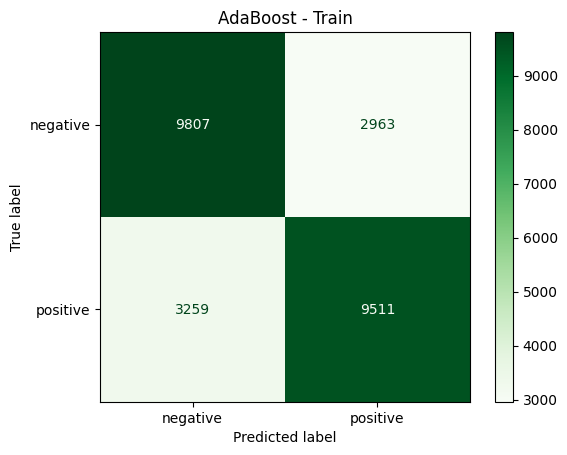

=============== ADA BOOST - TEST ===============
              precision    recall  f1-score   support

    negative       0.37      0.50      0.42      1556
    positive       0.84      0.76      0.80      5498

    accuracy                           0.70      7054
   macro avg       0.60      0.63      0.61      7054
weighted avg       0.74      0.70      0.71      7054



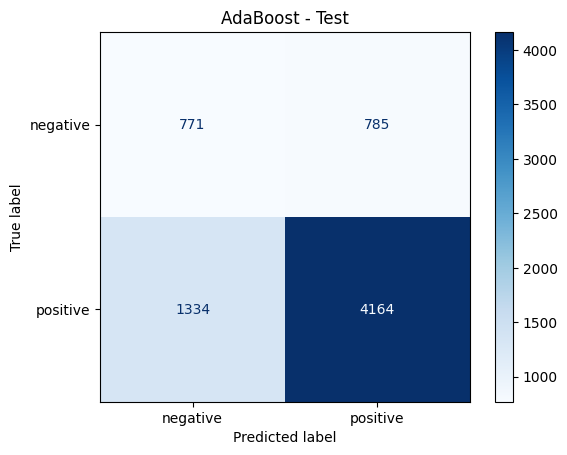

In [344]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(random_state=42)
model_ada.fit(X_train_resampled, y_train_resampled)

y_pred_train_ada = model_ada.predict(X_train_resampled)
y_pred_test_ada = model_ada.predict(X_test)

print("=============== ADA BOOST - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_ada, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_ada, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("AdaBoost - Train")
plt.show()

print("=============== ADA BOOST - TEST ===============")
print(classification_report(y_test, y_pred_test_ada, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_ada, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("AdaBoost - Test")
plt.show()


### MODEL 6 - CAT BOOST

=============== CAT BOOST - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.91      0.83      0.87     12770
    positive       0.84      0.92      0.88     12770

    accuracy                           0.87     25540
   macro avg       0.88      0.87      0.87     25540
weighted avg       0.88      0.87      0.87     25540



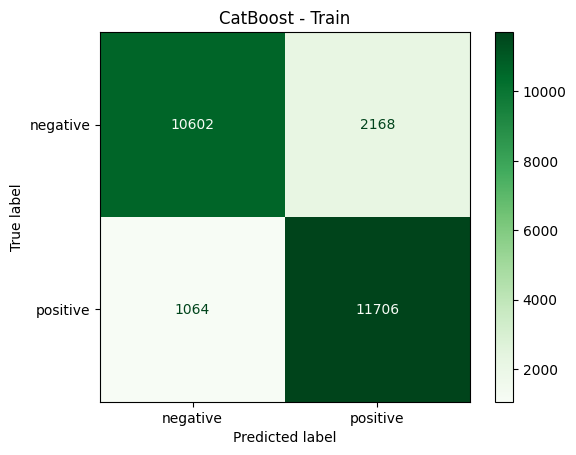

=============== CAT BOOST - TEST ===============
              precision    recall  f1-score   support

    negative       0.51      0.35      0.41      1556
    positive       0.83      0.91      0.87      5498

    accuracy                           0.78      7054
   macro avg       0.67      0.63      0.64      7054
weighted avg       0.76      0.78      0.77      7054



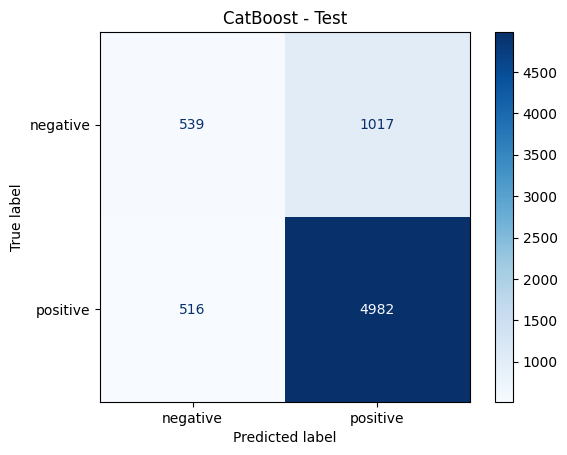

In [345]:
from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(verbose=0, random_state=42)
model_cat.fit(X_train_resampled, y_train_resampled)

y_pred_train_cat = model_cat.predict(X_train_resampled)
y_pred_test_cat = model_cat.predict(X_test)

print("=============== CAT BOOST - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_cat, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_cat, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("CatBoost - Train")
plt.show()

print("=============== CAT BOOST - TEST ===============")
print(classification_report(y_test, y_pred_test_cat, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_cat, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("CatBoost - Test")
plt.show()

Fitting 3 folds for each of 81 candidates, totalling 243 fits


d:\.STUDY\Cawu5\DM\CODE_FINAL\steam_games_analysis\.venv\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found:  {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.05}

=============== CATBOOST (GRID SEARCH TUNED) - TEST ===============
              precision    recall  f1-score   support

    negative       0.39      0.46      0.42      1556
    positive       0.84      0.80      0.82      5498

    accuracy                           0.73      7054
   macro avg       0.62      0.63      0.62      7054
weighted avg       0.74      0.73      0.73      7054



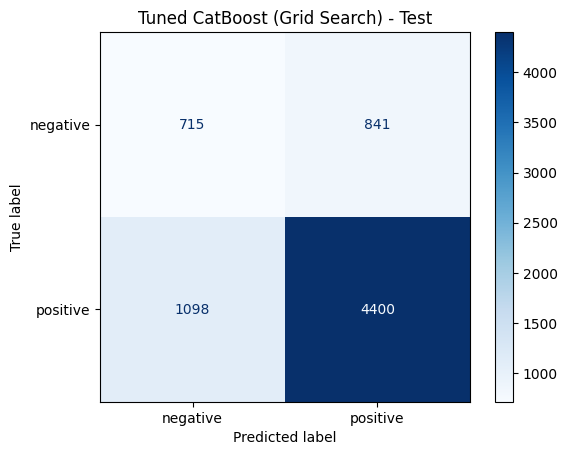

In [346]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

param_grid_cat = {
    'iterations': [200, 300, 500],
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

cat = CatBoostClassifier(verbose=0, random_state=42)

grid_search_cat = GridSearchCV(
    estimator=cat,
    param_grid=param_grid_cat,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='precision'
)

grid_search_cat.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search_cat.best_params_)

best_cat_model = grid_search_cat.best_estimator_

y_pred_test_best_cat = best_cat_model.predict(X_test)

print("\n=============== CATBOOST (GRID SEARCH TUNED) - TEST ===============")
print(classification_report(y_test, y_pred_test_best_cat, target_names=['negative', 'positive']))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_best_cat, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Tuned CatBoost (Grid Search) - Test")
plt.show()

### SAVE WINNER

In [347]:
import joblib

joblib.dump(best_rf_model, 'models/precise_rf.pkl')
joblib.dump(model_cat, 'models/aggressive_catboost.pkl')

['models/aggressive_catboost.pkl']

## INTERPRETATION

In [348]:
model_precise = joblib.load('models/precise_rf.pkl')
model_aggressive = joblib.load('models/aggressive_catboost.pkl')

### FEATURE IMPORTANCE

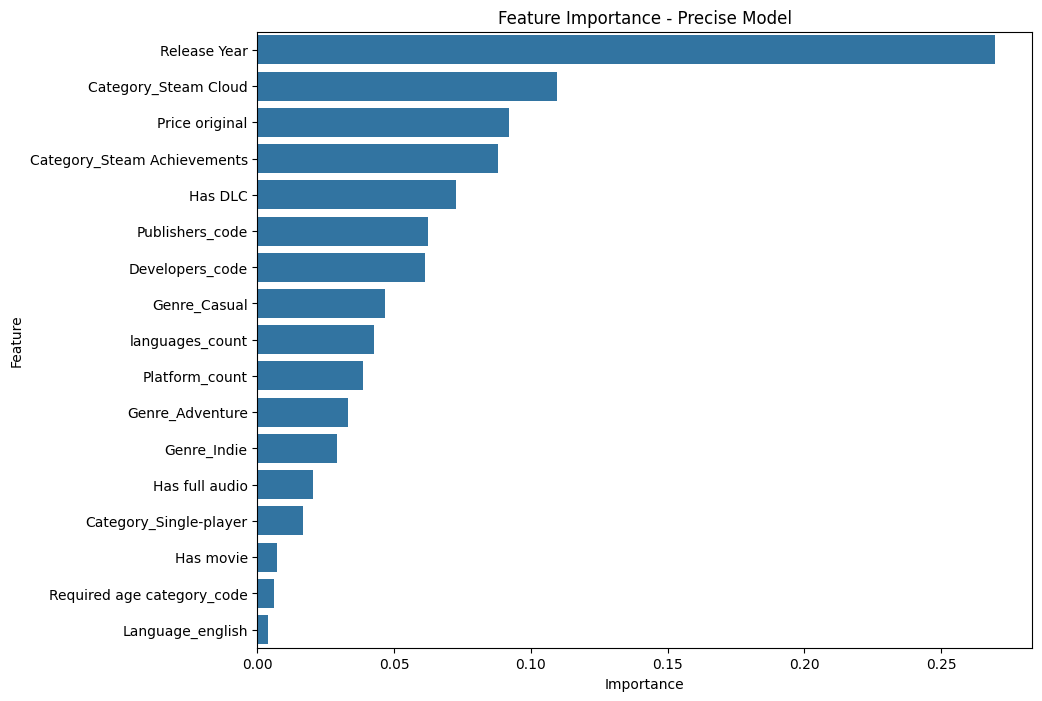

                        Feature  Importance
4                  Release Year    0.269899
16         Category_Steam Cloud    0.109428
0                Price original    0.092127
15  Category_Steam Achievements    0.087818
3                       Has DLC    0.072622
7               Publishers_code    0.062391
6               Developers_code    0.061409
12                 Genre_Casual    0.046655
5               languages_count    0.042474
9                Platform_count    0.038667
11              Genre_Adventure    0.032985
13                  Genre_Indie    0.029179
1                Has full audio    0.020446
14       Category_Single-player    0.016687
2                     Has movie    0.007193
10   Required age category_code    0.006120
8              Language_english    0.003900


In [349]:
feature_importances = model_precise.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Precise Model')
plt.show()

print(importance_df)

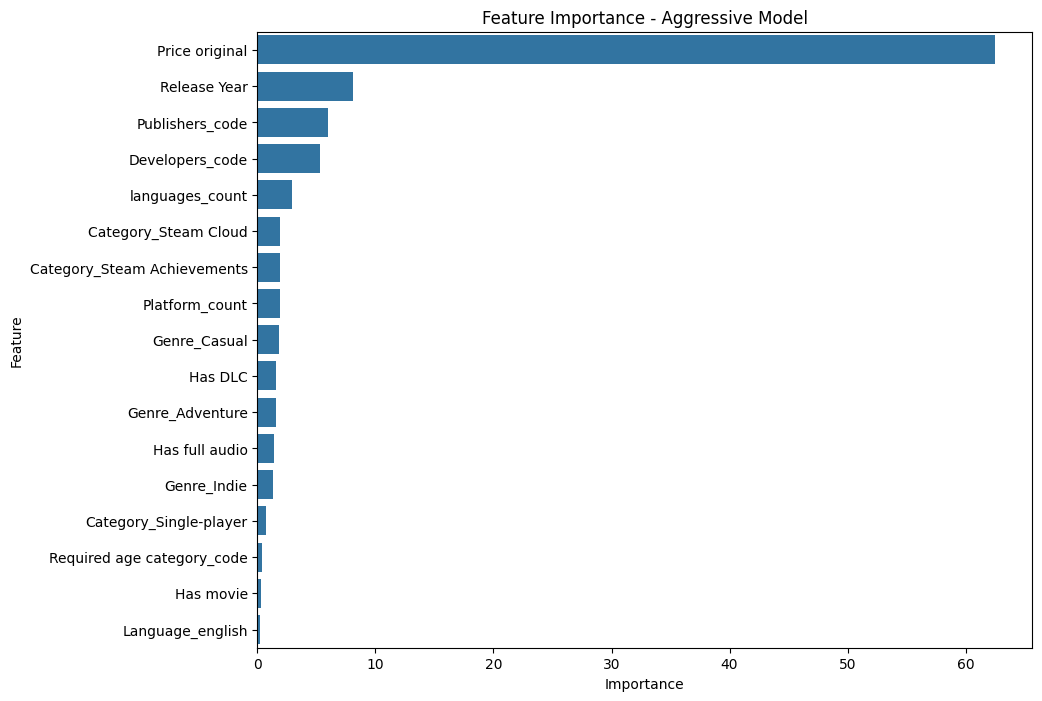

                        Feature  Importance
0                Price original   62.531421
4                  Release Year    8.099913
7               Publishers_code    5.939453
6               Developers_code    5.334811
5               languages_count    2.963065
16         Category_Steam Cloud    1.930907
15  Category_Steam Achievements    1.904457
9                Platform_count    1.885950
12                 Genre_Casual    1.848187
3                       Has DLC    1.585800
11              Genre_Adventure    1.562428
1                Has full audio    1.393851
13                  Genre_Indie    1.325013
14       Category_Single-player    0.769372
10   Required age category_code    0.382045
2                     Has movie    0.326255
8              Language_english    0.217071


In [350]:
feature_importances = model_aggressive.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Aggressive Model')
plt.show()

print(importance_df)

### PARTIAL DEPENDENCE

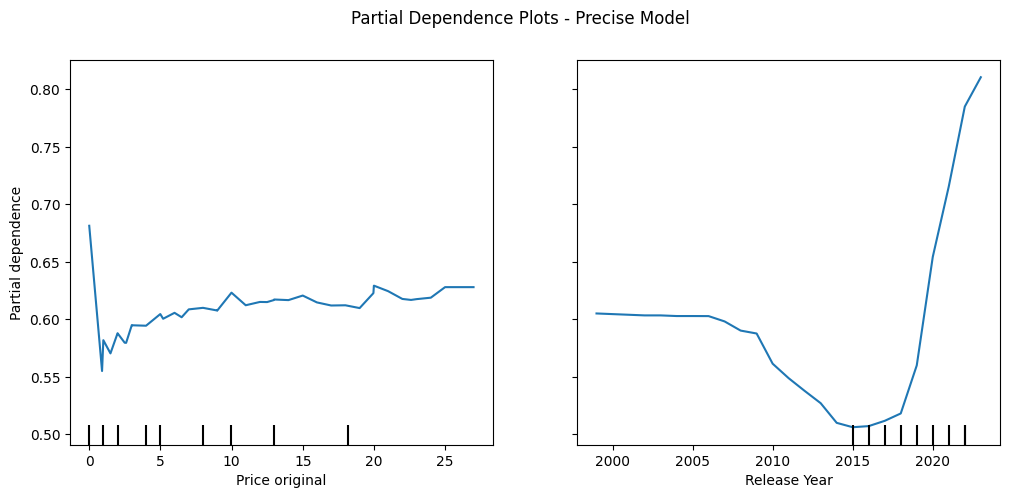

In [351]:
from sklearn.inspection import PartialDependenceDisplay

top_features = importance_df['Feature'].head(2).tolist()

fig, ax = plt.subplots(figsize=(12, 5))
display = PartialDependenceDisplay.from_estimator(
    model_precise,
    X_test,
    features=top_features,
    ax=ax
)
plt.suptitle('Partial Dependence Plots - Precise Model')
plt.show()

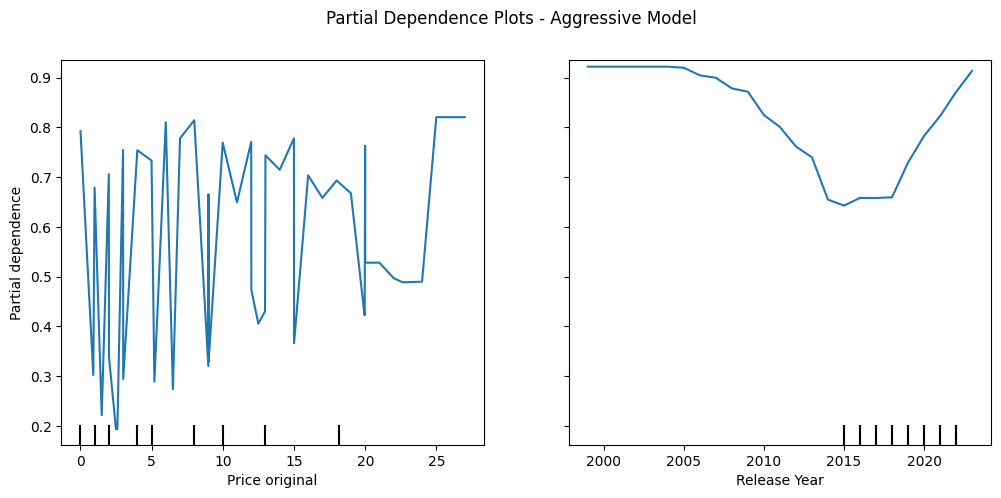

In [352]:
from sklearn.inspection import PartialDependenceDisplay

top_features = importance_df['Feature'].head(2).tolist()

fig, ax = plt.subplots(figsize=(12, 5))
display = PartialDependenceDisplay.from_estimator(
    model_aggressive,
    X_test,
    features=top_features,
    ax=ax
)
plt.suptitle('Partial Dependence Plots - Aggressive Model')
plt.show()

### ANALYZE DEVS AND PUBS - MODEL_PRECISE

In [353]:
print(X_test.columns)

Index(['Price original', 'Has full audio', 'Has movie', 'Has DLC',
       'Release Year', 'languages_count', 'Developers_code', 'Publishers_code',
       'Language_english', 'Platform_count', 'Required age category_code',
       'Genre_Adventure', 'Genre_Casual', 'Genre_Indie',
       'Category_Single-player', 'Category_Steam Achievements',
       'Category_Steam Cloud'],
      dtype='object')


In [354]:
predictions = model_precise.predict(X_test)

results_df = X_test.copy()
results_df['predicted_success'] = predictions

successful_predictions_df = results_df[results_df['predicted_success'] == 'positive']

In [355]:
successful_devs = successful_predictions_df['Developers_code'].value_counts().reset_index()
successful_devs.columns = ['Developers_code', 'Predicted Success Count']

successful_pubs = successful_predictions_df['Publishers_code'].value_counts().reset_index()
successful_pubs.columns = ['Publishers_code', 'Predicted Success Count']

successful_devs['Developer_Name'] = developer_encoder.inverse_transform(successful_devs['Developers_code'])
successful_pubs['Publisher_Name'] = publisher_encoder.inverse_transform(successful_pubs['Publishers_code'])

In [356]:
print("--- Developers Predicted to be Successful Most Often ---")
successful_devs[['Developers_code', 'Developer_Name', 'Predicted Success Count']]

--- Developers Predicted to be Successful Most Often ---


,Developers_code,Developer_Name,Predicted Success Count
0,8083,Others,1601
1,1239,Choice of Games,40
2,1850,Dnovel,18
3,556,"Atomic Fabrik,Cristian Manolachi",17
4,3765,Laush Dmitriy Sergeevich,17
...,...,...,...
2309,1840,Dischan Media,1
2310,3959,Luna Apps,1
2311,5043,"Pilgrim Adventures,GrabTheGames Studios",1
2312,8047,莉莉恩工作室,1


In [357]:
print("\n--- Publishers Predicted to be Successful Most Often ---")
successful_pubs[['Publishers_code', 'Publisher_Name', 'Predicted Success Count']]


--- Publishers Predicted to be Successful Most Often ---


,Publishers_code,Publisher_Name,Predicted Success Count
0,7125,Others,1530
1,686,Big Fish Games,46
2,1073,Choice of Games,40
3,4456,Piece Of Voxel,21
4,3320,Laush Studio,20
...,...,...,...
1938,6710,"familyplay,Markt+Technik",1
1939,2809,ImaginationOverflow,1
1940,6448,Wolfire Games,1
1941,6431,WinterSpring Games,1


### ANALYZE "Choice of Games"

In [358]:
DEV_CODE = 1239
PUB_CODE = 1073

success_probs = model_precise.predict_proba(X_test)[:, 1]

results_df = X_test.copy()
results_df['predicted_success'] = predictions
results_df['success_probability'] = success_probs

company_games_df = results_df[
    (results_df['Developers_code'] == DEV_CODE) |
    (results_df['Publishers_code'] == PUB_CODE)
]

print(f"Found {len(company_games_df)} games associated with this company.")
company_games_df.head()

Found 43 games associated with this company.


,Price original,Has full audio,Has movie,Has DLC,Release Year,languages_count,Developers_code,Publishers_code,Language_english,Platform_count,Required age category_code,Genre_Adventure,Genre_Casual,Genre_Indie,Category_Single-player,Category_Steam Achievements,Category_Steam Cloud,predicted_success,success_probability
140,6.99,0,1,0,2018,1,1239,1073,1,3,1,1,0,1,1,1,1,positive,0.545050
372,4.99,0,1,0,2018,1,1239,1073,1,3,1,1,0,1,1,1,1,positive,0.522402
396,6.99,0,1,0,2017,1,1239,1073,1,3,1,1,0,1,1,1,1,positive,0.543286
408,5.99,0,1,0,2019,1,1239,1073,1,3,1,1,1,1,1,1,1,positive,0.594085
588,5.99,0,1,1,2016,1,1239,1073,1,3,1,1,0,1,1,1,1,positive,0.588204


In [359]:
prediction_counts = company_games_df['predicted_success'].value_counts()

print("\nPrediction counts for the company's games:")
print(prediction_counts)


Prediction counts for the company's games:
predicted_success
positive    40
negative     3
Name: count, dtype: int64



Their most successful 'Release Year' based on the model is: 2015


C:\Users\Wesley\AppData\Local\Temp\ipykernel_20392\1182529290.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Success Probability', loc='upper right')


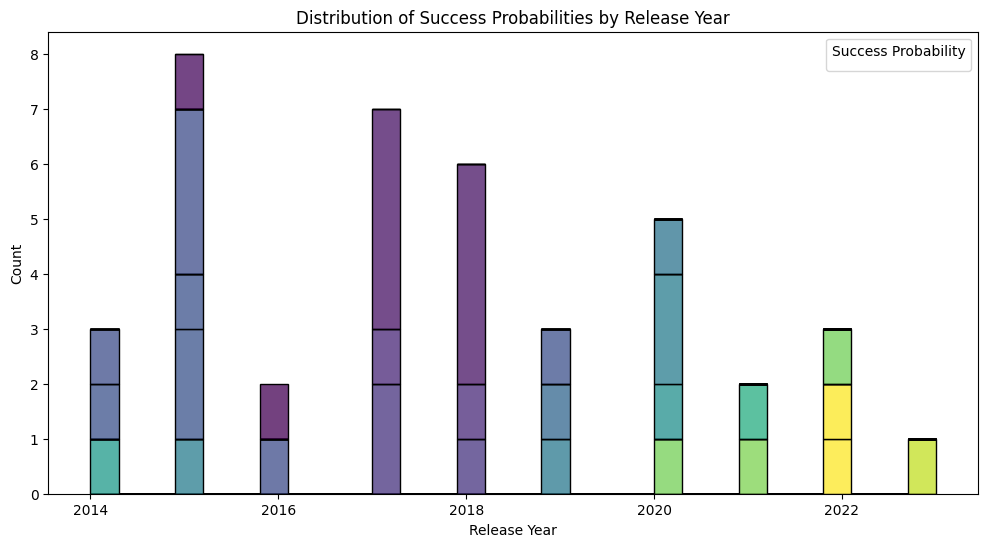

In [360]:
successful_company_games = company_games_df[company_games_df['predicted_success'] == 'positive']

most_successful_year = successful_company_games['Release Year'].mode()[0]

print(f"\nTheir most successful 'Release Year' based on the model is: {most_successful_year}")

plt.figure(figsize=(12, 6))
sns.histplot(
    data=successful_company_games,
	x='Release Year',
	hue='success_probability',
	multiple='stack',
	bins=30,
	palette='viridis'
)
plt.title('Distribution of Success Probabilities by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Success Probability', loc='upper right')
plt.show()

In [361]:
feature_columns = [
    'Genre_Adventure', 'Genre_Casual', 'Genre_Indie',
    'Category_Single-player', 'Category_Steam Achievements', 'Category_Steam Cloud'
]

print("\n--- Impact Analysis ---")
for column in feature_columns:
    mean_probs = results_df.groupby(column)['success_probability'].mean()
    print(f"\n--- {column} ---")
    print(mean_probs)

    if 1 in mean_probs.index and 0 in mean_probs.index:
        lift = (mean_probs[1] - mean_probs[0]) * 100
        print(f"Impact: Having this feature increases success probability by {lift:.2f} percentage points on average.")


--- Impact Analysis ---

--- Genre_Adventure ---
Genre_Adventure
0    0.591826
1    0.664480
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 7.27 percentage points on average.

--- Genre_Casual ---
Genre_Casual
0    0.597922
1    0.657006
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 5.91 percentage points on average.

--- Genre_Indie ---
Genre_Indie
0    0.556391
1    0.648247
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 9.19 percentage points on average.

--- Category_Single-player ---
Category_Single-player
0    0.500048
1    0.626525
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 12.65 percentage points on average.

--- Category_Steam Achievements ---
Category_Steam Achievements
0    0.514630
1    0.694991
Name: success_probability, dtype: float64
Impact: Hav

In [362]:
import itertools

genre_cols = ['Genre_Adventure', 'Genre_Casual', 'Genre_Indie']
category_cols = ['Category_Single-player', 'Category_Steam Achievements', 'Category_Steam Cloud']

print("\n--- Synergy Analysis ---")
for genre, category in itertools.product(genre_cols, category_cols):
    print(f"\n--- {genre} + {category} ---")
    
    interaction_effect = results_df.groupby([genre, category])['success_probability'].mean().unstack()
    print(interaction_effect)


--- Synergy Analysis ---

--- Genre_Adventure + Category_Single-player ---
Category_Single-player         0         1
Genre_Adventure                           
0                       0.481213  0.597245
1                       0.619334  0.664938

--- Genre_Adventure + Category_Steam Achievements ---
Category_Steam Achievements         0         1
Genre_Adventure                                
0                            0.481032  0.667584
1                            0.561666  0.731656

--- Genre_Adventure + Category_Steam Cloud ---
Category_Steam Cloud         0         1
Genre_Adventure                         
0                     0.524774  0.726973
1                     0.611679  0.759720

--- Genre_Casual + Category_Single-player ---
Category_Single-player         0         1
Genre_Casual                              
0                       0.449963  0.603487
1                       0.605157  0.658288

--- Genre_Casual + Category_Steam Achievements ---
Category_Steam Achieve

In [363]:
print("\n--- Key Factors FOR THIS COMPANY ---")
for column in feature_columns:
    mean_probs_company = company_games_df.groupby(column)['success_probability'].mean()
    
    if len(mean_probs_company) > 1:
        print(f"\n--- {column} ---")
        print(mean_probs_company)


--- Key Factors FOR THIS COMPANY ---

--- Genre_Adventure ---
Genre_Adventure
0    0.666836
1    0.563473
Name: success_probability, dtype: float64

--- Genre_Casual ---
Genre_Casual
0    0.573053
1    0.715368
Name: success_probability, dtype: float64

--- Genre_Indie ---
Genre_Indie
0    0.800729
1    0.594739
Name: success_probability, dtype: float64

--- Category_Single-player ---
Category_Single-player
0    0.591200
1    0.599728
Name: success_probability, dtype: float64

--- Category_Steam Achievements ---
Category_Steam Achievements
0    0.553809
1    0.601760
Name: success_probability, dtype: float64


### ANALYZE DEVS AND PUBS - MODEL_AGGRESSIVE

In [364]:
print(X_test.columns)

Index(['Price original', 'Has full audio', 'Has movie', 'Has DLC',
       'Release Year', 'languages_count', 'Developers_code', 'Publishers_code',
       'Language_english', 'Platform_count', 'Required age category_code',
       'Genre_Adventure', 'Genre_Casual', 'Genre_Indie',
       'Category_Single-player', 'Category_Steam Achievements',
       'Category_Steam Cloud'],
      dtype='object')


In [365]:
predictions = model_aggressive.predict(X_test)

results_df = X_test.copy()
results_df['predicted_success'] = predictions

successful_predictions_df = results_df[results_df['predicted_success'] == 'positive']

In [366]:
successful_devs = successful_predictions_df['Developers_code'].value_counts().reset_index()
successful_devs.columns = ['Developers_code', 'Predicted Success Count']

successful_pubs = successful_predictions_df['Publishers_code'].value_counts().reset_index()
successful_pubs.columns = ['Publishers_code', 'Predicted Success Count']

successful_devs['Developer_Name'] = developer_encoder.inverse_transform(successful_devs['Developers_code'])
successful_pubs['Publisher_Name'] = publisher_encoder.inverse_transform(successful_pubs['Publishers_code'])

In [367]:
print("--- Developers Predicted to be Successful Most Often ---")
successful_devs[['Developers_code', 'Developer_Name', 'Predicted Success Count']]

--- Developers Predicted to be Successful Most Often ---


,Developers_code,Developer_Name,Predicted Success Count
0,8083,Others,1830
1,1239,Choice of Games,33
2,3765,Laush Dmitriy Sergeevich,22
3,1850,Dnovel,20
4,556,"Atomic Fabrik,Cristian Manolachi",19
...,...,...,...
2641,5043,"Pilgrim Adventures,GrabTheGames Studios",1
2642,8047,莉莉恩工作室,1
2643,28,1CC Games,1
2644,1979,DyingCat,1


In [368]:
print("\n--- Publishers Predicted to be Successful Most Often ---")
successful_pubs[['Publishers_code', 'Publisher_Name', 'Predicted Success Count']]


--- Publishers Predicted to be Successful Most Often ---


,Publishers_code,Publisher_Name,Predicted Success Count
0,7125,Others,1736
1,686,Big Fish Games,53
2,1073,Choice of Games,33
3,3320,Laush Studio,25
4,5169,Sekai Project,24
...,...,...,...
2174,5560,Strongshell Software,1
2175,3212,KomodoBit Games,1
2176,790,BluePrinting,1
2177,2273,Gameloft,1


### ANALYZE "Choice of Games"

In [369]:
DEV_CODE = 1239
PUB_CODE = 1073

success_probs = model_precise.predict_proba(X_test)[:, 1]

results_df = X_test.copy()
results_df['predicted_success'] = predictions
results_df['success_probability'] = success_probs

company_games_df = results_df[
    (results_df['Developers_code'] == DEV_CODE) |
    (results_df['Publishers_code'] == PUB_CODE)
]

print(f"Found {len(company_games_df)} games associated with this company.")
company_games_df.head()

Found 43 games associated with this company.


,Price original,Has full audio,Has movie,Has DLC,Release Year,languages_count,Developers_code,Publishers_code,Language_english,Platform_count,Required age category_code,Genre_Adventure,Genre_Casual,Genre_Indie,Category_Single-player,Category_Steam Achievements,Category_Steam Cloud,predicted_success,success_probability
140,6.99,0,1,0,2018,1,1239,1073,1,3,1,1,0,1,1,1,1,positive,0.545050
372,4.99,0,1,0,2018,1,1239,1073,1,3,1,1,0,1,1,1,1,negative,0.522402
396,6.99,0,1,0,2017,1,1239,1073,1,3,1,1,0,1,1,1,1,positive,0.543286
408,5.99,0,1,0,2019,1,1239,1073,1,3,1,1,1,1,1,1,1,positive,0.594085
588,5.99,0,1,1,2016,1,1239,1073,1,3,1,1,0,1,1,1,1,positive,0.588204


In [370]:
prediction_counts = company_games_df['predicted_success'].value_counts()

print("\nPrediction counts for the company's games:")
print(prediction_counts)


Prediction counts for the company's games:
predicted_success
positive    33
negative    10
Name: count, dtype: int64



Their most successful 'Release Year' based on the model is: 2015


C:\Users\Wesley\AppData\Local\Temp\ipykernel_20392\1182529290.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Success Probability', loc='upper right')


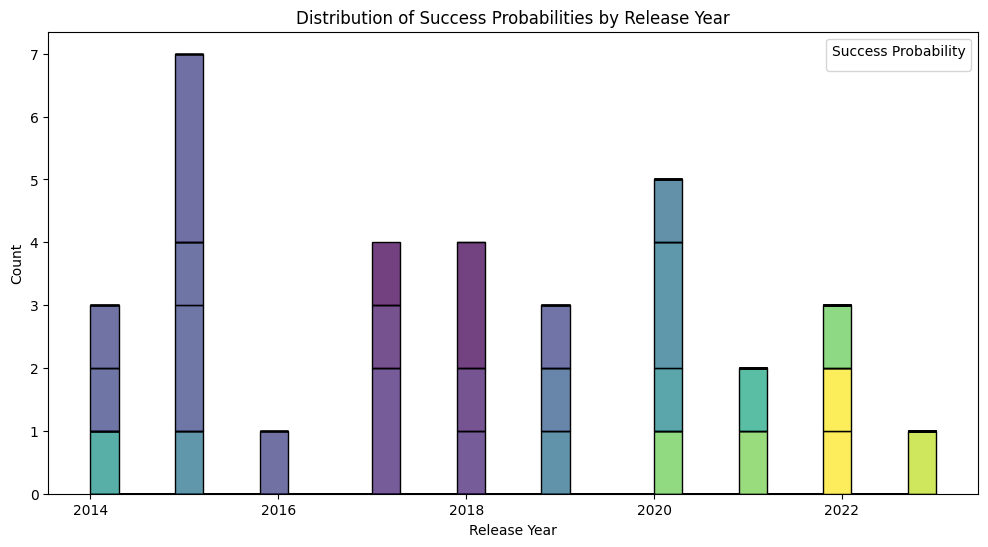

In [371]:
successful_company_games = company_games_df[company_games_df['predicted_success'] == 'positive']

most_successful_year = successful_company_games['Release Year'].mode()[0]

print(f"\nTheir most successful 'Release Year' based on the model is: {most_successful_year}")

plt.figure(figsize=(12, 6))
sns.histplot(
    data=successful_company_games,
	x='Release Year',
	hue='success_probability',
	multiple='stack',
	bins=30,
	palette='viridis'
)
plt.title('Distribution of Success Probabilities by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Success Probability', loc='upper right')
plt.show()

In [372]:
feature_columns = [
    'Genre_Adventure', 'Genre_Casual', 'Genre_Indie',
    'Category_Single-player', 'Category_Steam Achievements', 'Category_Steam Cloud'
]

print("\n--- Impact Analysis ---")
for column in feature_columns:
    mean_probs = results_df.groupby(column)['success_probability'].mean()
    print(f"\n--- {column} ---")
    print(mean_probs)

    if 1 in mean_probs.index and 0 in mean_probs.index:
        lift = (mean_probs[1] - mean_probs[0]) * 100
        print(f"Impact: Having this feature increases success probability by {lift:.2f} percentage points on average.")


--- Impact Analysis ---

--- Genre_Adventure ---
Genre_Adventure
0    0.591826
1    0.664480
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 7.27 percentage points on average.

--- Genre_Casual ---
Genre_Casual
0    0.597922
1    0.657006
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 5.91 percentage points on average.

--- Genre_Indie ---
Genre_Indie
0    0.556391
1    0.648247
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 9.19 percentage points on average.

--- Category_Single-player ---
Category_Single-player
0    0.500048
1    0.626525
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 12.65 percentage points on average.

--- Category_Steam Achievements ---
Category_Steam Achievements
0    0.514630
1    0.694991
Name: success_probability, dtype: float64
Impact: Hav

In [373]:
import itertools

genre_cols = ['Genre_Adventure', 'Genre_Casual', 'Genre_Indie']
category_cols = ['Category_Single-player', 'Category_Steam Achievements', 'Category_Steam Cloud']

print("\n--- Synergy Analysis ---")
for genre, category in itertools.product(genre_cols, category_cols):
    print(f"\n--- {genre} + {category} ---")
    
    interaction_effect = results_df.groupby([genre, category])['success_probability'].mean().unstack()
    print(interaction_effect)


--- Synergy Analysis ---

--- Genre_Adventure + Category_Single-player ---
Category_Single-player         0         1
Genre_Adventure                           
0                       0.481213  0.597245
1                       0.619334  0.664938

--- Genre_Adventure + Category_Steam Achievements ---
Category_Steam Achievements         0         1
Genre_Adventure                                
0                            0.481032  0.667584
1                            0.561666  0.731656

--- Genre_Adventure + Category_Steam Cloud ---
Category_Steam Cloud         0         1
Genre_Adventure                         
0                     0.524774  0.726973
1                     0.611679  0.759720

--- Genre_Casual + Category_Single-player ---
Category_Single-player         0         1
Genre_Casual                              
0                       0.449963  0.603487
1                       0.605157  0.658288

--- Genre_Casual + Category_Steam Achievements ---
Category_Steam Achieve

In [374]:
print("\n--- Key Factors FOR THIS COMPANY ---")
for column in feature_columns:
    mean_probs_company = company_games_df.groupby(column)['success_probability'].mean()
    
    if len(mean_probs_company) > 1:
        print(f"\n--- {column} ---")
        print(mean_probs_company)


--- Key Factors FOR THIS COMPANY ---

--- Genre_Adventure ---
Genre_Adventure
0    0.666836
1    0.563473
Name: success_probability, dtype: float64

--- Genre_Casual ---
Genre_Casual
0    0.573053
1    0.715368
Name: success_probability, dtype: float64

--- Genre_Indie ---
Genre_Indie
0    0.800729
1    0.594739
Name: success_probability, dtype: float64

--- Category_Single-player ---
Category_Single-player
0    0.591200
1    0.599728
Name: success_probability, dtype: float64

--- Category_Steam Achievements ---
Category_Steam Achievements
0    0.553809
1    0.601760
Name: success_probability, dtype: float64
